# **1. 회귀(Regression) 예측**

* 수치형 값을 예측(Y의 값이 연속된 수치로 표현)
* 예> 주택 가격 예측, 매출액 예측
* [도큐먼트](https://scikit-learn.org/stable/supervised_learning.html#supervised-learning)

In [ ]:
import pandas as pd
import numpy as np

np.set_printoptions(suppress = True) # e 표현 등을 일반 숫자로 변경해주는 옵션

In [ ]:
from sklearn.datasets import load_boston

In [ ]:
# 데이터 로드
data = load_boston()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

In [ ]:
# 요약 정보 알아내기(DESCR)
print(data['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [ ]:
# 데이터 프레임 생성하기
df = pd.DataFrame(data['data'],columns = data['feature_names'])

In [ ]:
# target 데이터를 df['MEDV'] 컬럼으로 저장(새로운 컬럼 생성)
df['MEDV'] = data['target']

In [ ]:
# 데이터 확인
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### **컬럼**
속성수: 13
* **CRIM**: 범죄율
* **ZN**: 25,000 평방 피트 당 주거용 토지의 비율
* **INDUS**: 비소매(non-retail) 비즈니스 면적 비율
* **CHAS**: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
* **NOX**: 산화 질소 농도 (천만 분의 1)
* **RM**:주거 당 평균 객실 수
* **AGE**: 1940 년 이전에 건축된 자가 소유 점유 비율
* **DIS**: 5 개의 보스턴 고용 센터까지의 가중 거리     
* **RAD**: 고속도로 접근성 지수
* **TAX**: 10,000 달러 당 전체 가치 재산 세율
* **PTRATIO**  도시 별 학생-교사 비율
* **B**: 1000 (Bk-0.63) ^ 2 여기서 Bk는 도시 별 검정 비율입니다.
* **LSTAT**: 인구의 낮은 지위
* **MEDV**: 자가 주택의 중앙값 (1,000 달러 단위)


In [ ]:
# train_test_split를 사용하여 x_train,x_test,y_train,y_test에 나누어 저장하기
from sklearn.model_selection import train_test_split 

In [ ]:
# 학습시키기
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV',1),df['MEDV'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
x_train.shape, x_test.shape

((379, 13), (127, 13))

In [ ]:
x_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
472,3.56868,0.0,18.10,0.0,0.580,6.437,75.0,2.8965,24.0,666.0,20.2,393.37,14.36
73,0.19539,0.0,10.81,0.0,0.413,6.245,6.2,5.2873,4.0,305.0,19.2,377.17,7.54
386,24.39380,0.0,18.10,0.0,0.700,4.652,100.0,1.4672,24.0,666.0,20.2,396.90,28.28
321,0.18159,0.0,7.38,0.0,0.493,6.376,54.3,4.5404,5.0,287.0,19.6,396.90,6.87
105,0.13262,0.0,8.56,0.0,0.520,5.851,96.7,2.1069,5.0,384.0,20.9,394.05,16.47


In [ ]:
y_train.head()

472    23.2
73     23.4
386    10.5
321    23.1
105    19.5
Name: MEDV, dtype: float64

# **2. 평가 지표**

### **2-1. MSE(Mean Squared Error)**

* ${(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대한 제곱에 대하여 평균을 낸 값

### **2-2. MAE(Mean Absolute Error)**

* $(\frac{1}{n})\sum_{i=1}^{n}\left | y_{i} - x_{i} \right |$
* 예측값과 실제값의 차이에 대한 절댓값에 대하여 평균을 낸 값

### **2-3. RMSE(Root Mean Squared Error)**

* $\sqrt{(\frac{1}{n})\sum_{i=1}^{n}(y_{i} - x_{i})^{2}}$
* 예측값과 실제값의 차이에 대하여 평균을 낸 뒤 루트를 씌운 값

In [ ]:
pred = np.array([3,4,5]) # 예측값
actual = np.array([1,2,3]) # 실제값

In [ ]:
def func_mse(pred,actual): # 4.0
  mse = sum((pred-actual)**2)/len(actual)
  return mse

In [ ]:
func_mse(pred,actual)

4.0

In [ ]:
# 강사님 코드 
def my_mse(pred,actual):
  return ((pred - actual)**2).mean()

In [ ]:
my_mse(pred,actual)

4.0

In [ ]:
def func_mae(pred,actual): # 2.0
  mae = sum(abs(pred-actual))/len(actual)
  return mae

In [ ]:
func_mae(pred,actual)

2.0

In [ ]:
# 강사님 코드 
def my_mae(pred,actual):
  return np.abs(pred-actual).mean()

In [ ]:
my_mae(pred,actual)

2.0

In [ ]:
import math

In [ ]:
def func_rmse(pred,actual): # 2.0
  rmse = math.sqrt(my_mse(pred,actual))
  return rmse

In [ ]:
func_rmse(pred,actual)

2.0

In [ ]:
# 강사님 코드
def my_rmse(pred,actual):
  return np.sqrt(my_mse(pred, actual))

In [ ]:
my_rmse(pred,actual)

2.0

### **2-4. sklearn의 평가지표 활용**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [ ]:
my_mae(pred,actual), mean_absolute_error(pred,actual)

(2.0, 2.0)

In [ ]:
my_mse(pred,actual), mean_squared_error(pred,actual)

(4.0, 4.0)

# **3. 모델별 성능 확인을 위한 함수**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive', 
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray', 
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)
    
    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10
    
    length = len(df)
    
    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])
    
    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')
        
    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)
    
    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

# **4. LinearRegression**

* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)


In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression(n_jobs = -1) # n_jobs = -1: 모든 CPU를 사용하여라~

In [ ]:
model.fit(x_train,y_train)
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

LinearRegression(n_jobs=-1)

In [ ]:
pred = model.predict(x_test)

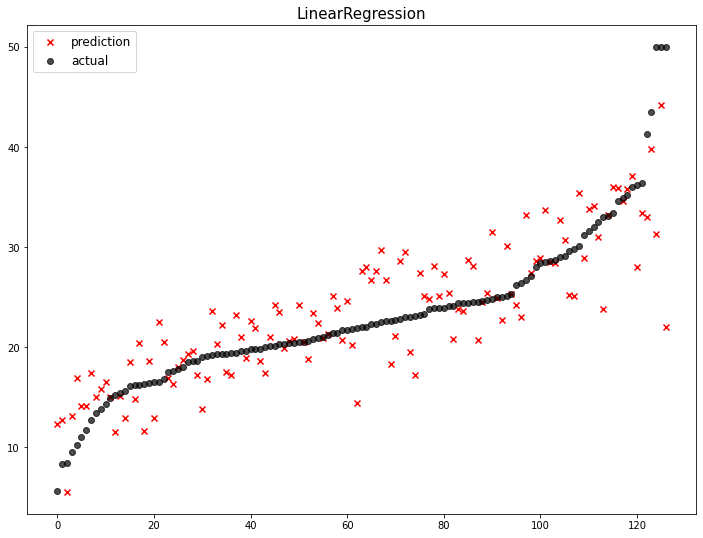

              model        mse
0  LinearRegression  21.222897


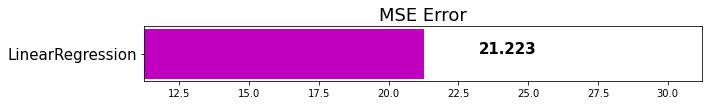

In [ ]:
mse_eval('LinearRegression',pred,y_test)

# **5. 규제(Regularization)**

* 학습이 과대적합 되는 것을 방지하고자 일종의 penalty를 부여하는 것
* L2 규제(릿지, Ridge)
  - 각 가중치 제곱의 합에 규제 강도 λ를 곱함
  - λ를 크게 하면 가중치가 더 많이 감소되고(규제를 중요시함), λ를 작게 하면 가중치가 증가함(규제를 중요시하지 않음)
  - $Error=MSE+αw^2$
* L1 규제(라쏘, Lasso)
  - 가중치의 제곱의 합이 아닌 가중치의 합을 더한 값에 규제 강도 λ를 곱하여 오차에 더함
  - 어떤 가중치(w)는 실제로 0이 됨 -> 모델에서 완전히 제외되는 특성이 생김
  - $Error=MSE+α|w|$
> L2 규제가 L1 규제에 비해 안정적이라 일반적으로 L2 규제가 더 많이 사용

### **5-1. 릿지(Ridge)**


In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# 값이 클수록 큰 규제
alphas = [100,10,1,0.1,0.01,0.001,0.0001]

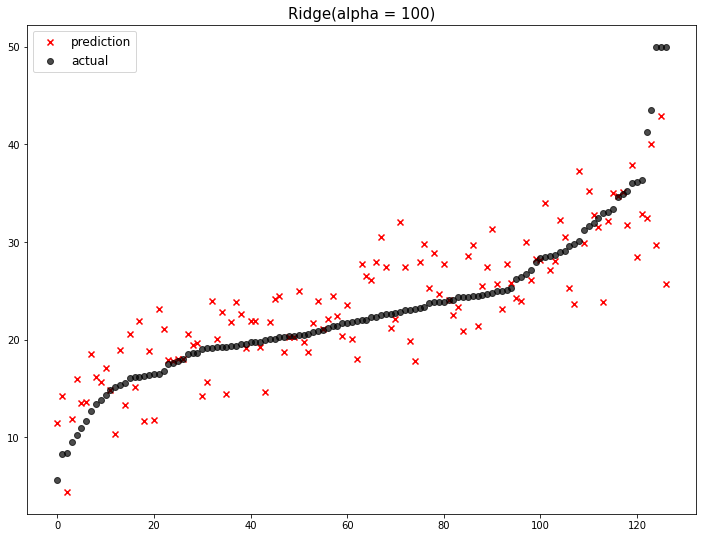

                  model        mse
0     Ridge(alpha = 100  21.752411
1    Ridge(alpha = 100)  21.752411
2      Ridge(alpha = 10  21.697395
3       Ridge(alpha = 1  21.303854
4      LinearRegression  21.222897
5  Ridge(alpha = 0.0001  21.222870
6   Ridge(alpha = 0.001  21.222629
7    Ridge(alpha = 0.01  21.220300
8     Ridge(alpha = 0.1  21.204815


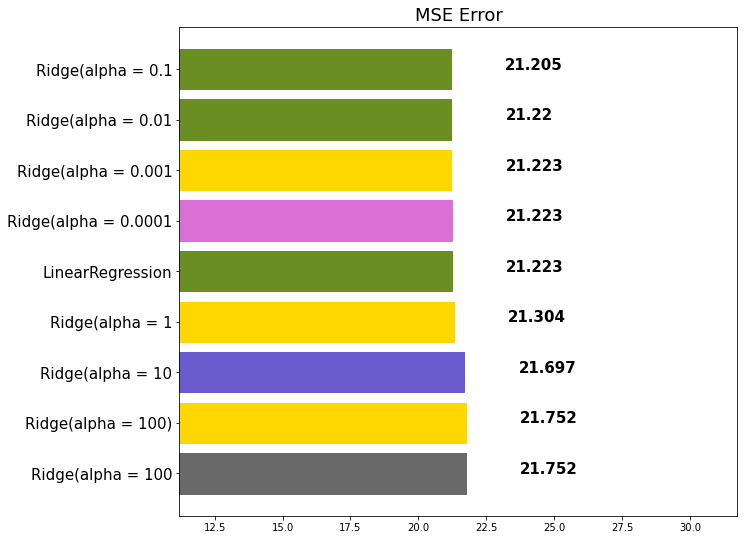

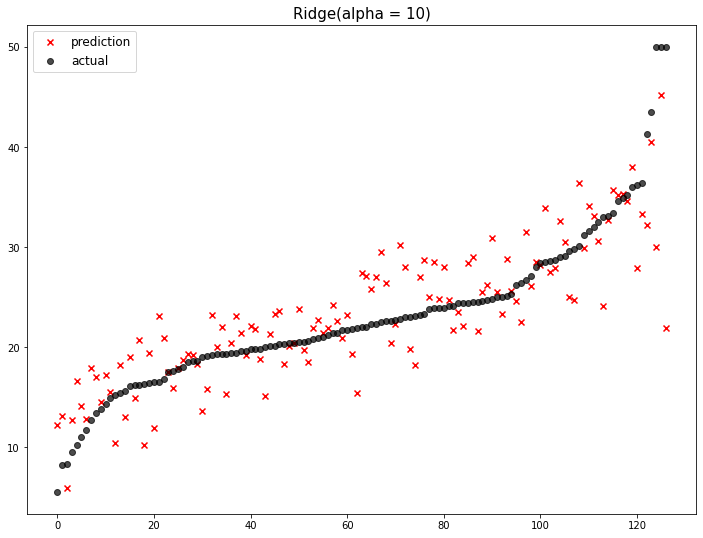

                  model        mse
0     Ridge(alpha = 100  21.752411
1    Ridge(alpha = 100)  21.752411
2      Ridge(alpha = 10  21.697395
3     Ridge(alpha = 10)  21.697395
4       Ridge(alpha = 1  21.303854
5      LinearRegression  21.222897
6  Ridge(alpha = 0.0001  21.222870
7   Ridge(alpha = 0.001  21.222629
8    Ridge(alpha = 0.01  21.220300
9     Ridge(alpha = 0.1  21.204815


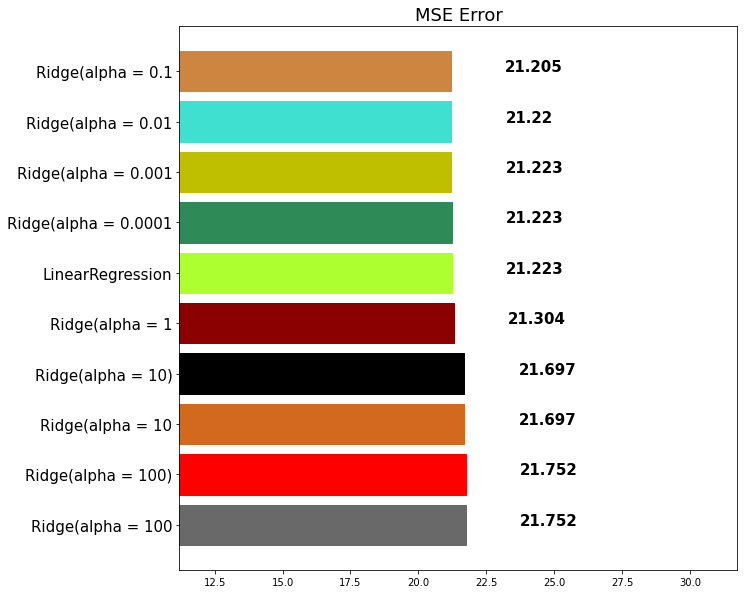

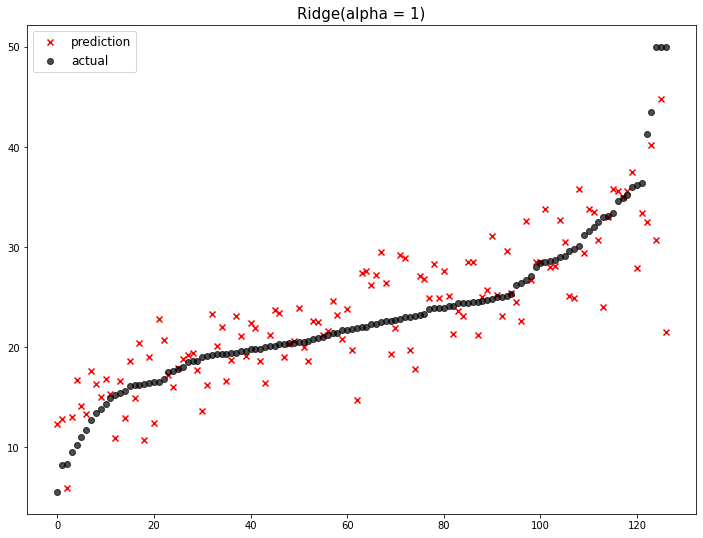

                   model        mse
0      Ridge(alpha = 100  21.752411
1     Ridge(alpha = 100)  21.752411
2       Ridge(alpha = 10  21.697395
3      Ridge(alpha = 10)  21.697395
4        Ridge(alpha = 1  21.303854
5       Ridge(alpha = 1)  21.303854
6       LinearRegression  21.222897
7   Ridge(alpha = 0.0001  21.222870
8    Ridge(alpha = 0.001  21.222629
9     Ridge(alpha = 0.01  21.220300
10     Ridge(alpha = 0.1  21.204815


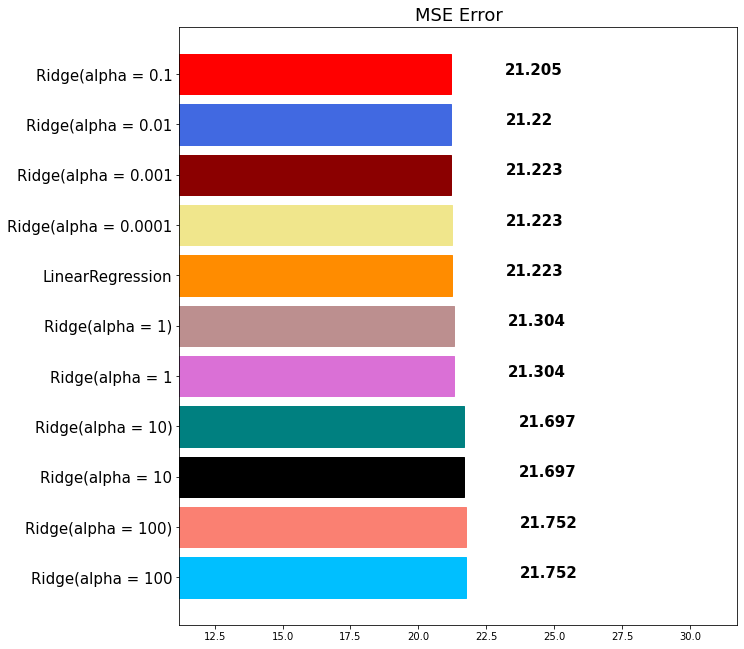

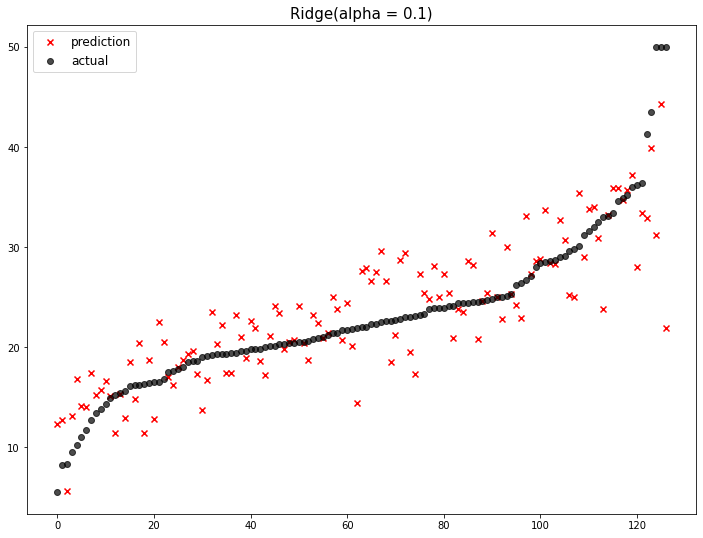

                   model        mse
0      Ridge(alpha = 100  21.752411
1     Ridge(alpha = 100)  21.752411
2       Ridge(alpha = 10  21.697395
3      Ridge(alpha = 10)  21.697395
4        Ridge(alpha = 1  21.303854
5       Ridge(alpha = 1)  21.303854
6       LinearRegression  21.222897
7   Ridge(alpha = 0.0001  21.222870
8    Ridge(alpha = 0.001  21.222629
9     Ridge(alpha = 0.01  21.220300
10     Ridge(alpha = 0.1  21.204815
11    Ridge(alpha = 0.1)  21.204815


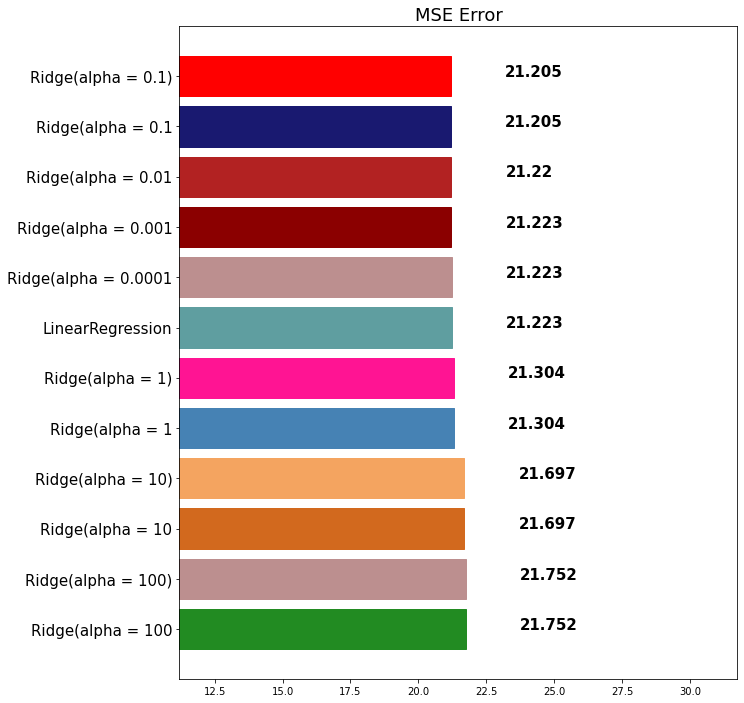

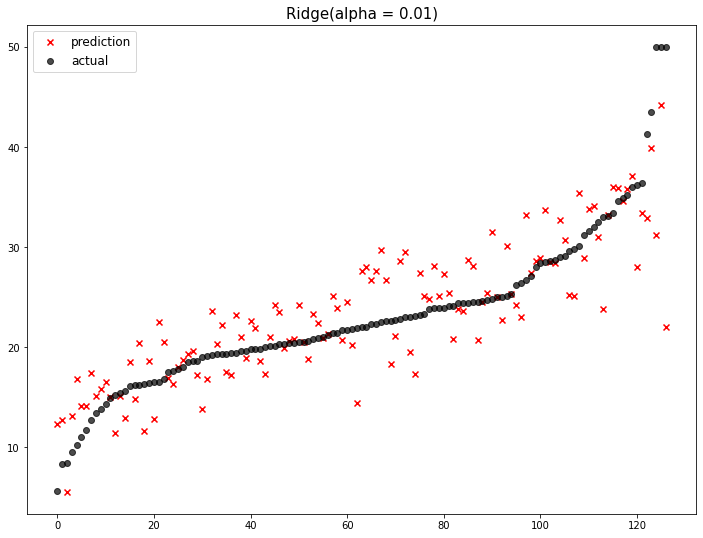

                   model        mse
0      Ridge(alpha = 100  21.752411
1     Ridge(alpha = 100)  21.752411
2       Ridge(alpha = 10  21.697395
3      Ridge(alpha = 10)  21.697395
4        Ridge(alpha = 1  21.303854
5       Ridge(alpha = 1)  21.303854
6       LinearRegression  21.222897
7   Ridge(alpha = 0.0001  21.222870
8    Ridge(alpha = 0.001  21.222629
9     Ridge(alpha = 0.01  21.220300
10   Ridge(alpha = 0.01)  21.220300
11     Ridge(alpha = 0.1  21.204815
12    Ridge(alpha = 0.1)  21.204815


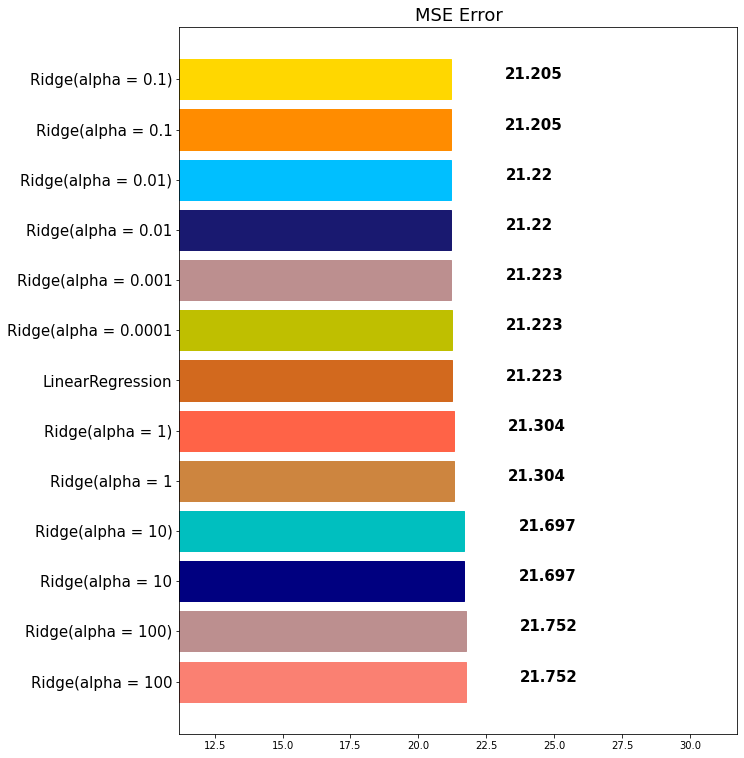

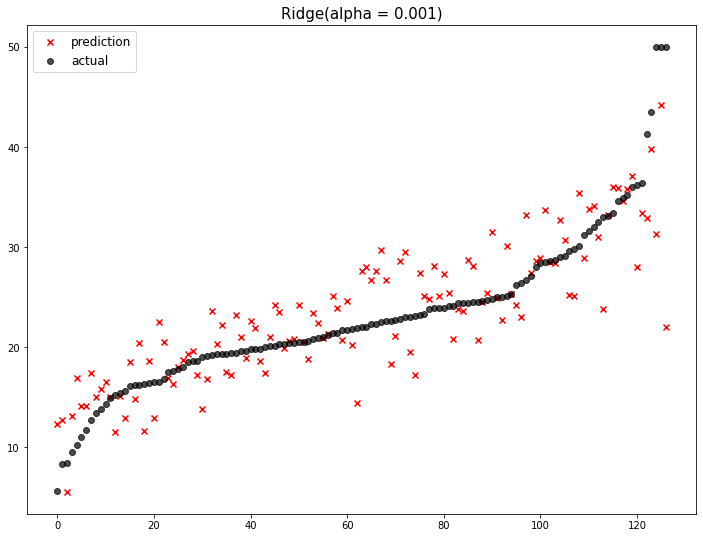

                   model        mse
0      Ridge(alpha = 100  21.752411
1     Ridge(alpha = 100)  21.752411
2       Ridge(alpha = 10  21.697395
3      Ridge(alpha = 10)  21.697395
4        Ridge(alpha = 1  21.303854
5       Ridge(alpha = 1)  21.303854
6       LinearRegression  21.222897
7   Ridge(alpha = 0.0001  21.222870
8    Ridge(alpha = 0.001  21.222629
9   Ridge(alpha = 0.001)  21.222629
10    Ridge(alpha = 0.01  21.220300
11   Ridge(alpha = 0.01)  21.220300
12     Ridge(alpha = 0.1  21.204815
13    Ridge(alpha = 0.1)  21.204815


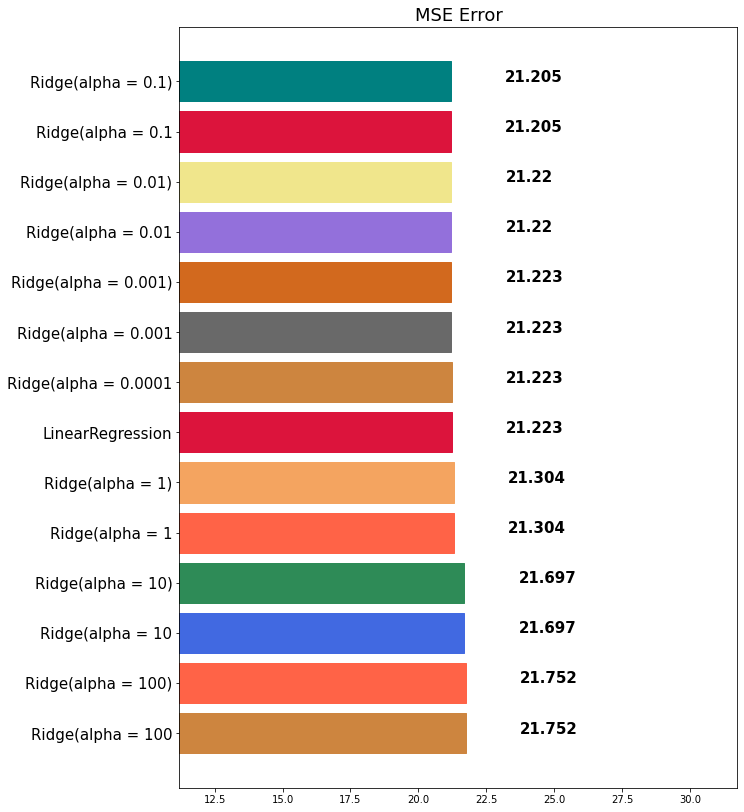

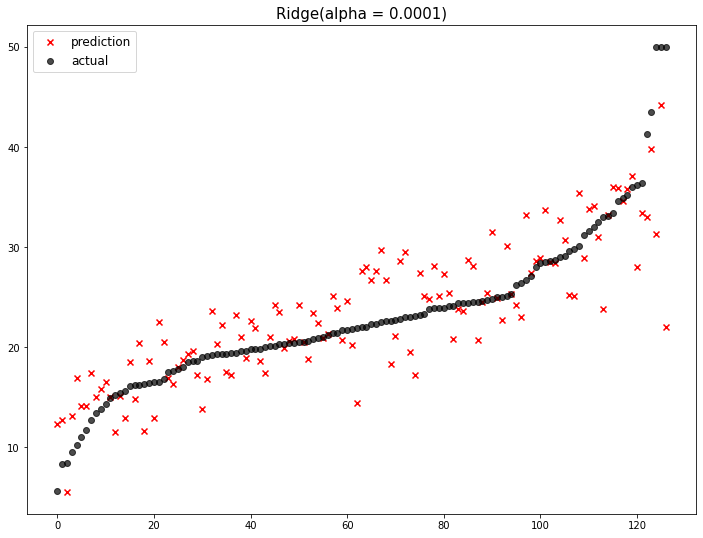

                    model        mse
0       Ridge(alpha = 100  21.752411
1      Ridge(alpha = 100)  21.752411
2        Ridge(alpha = 10  21.697395
3       Ridge(alpha = 10)  21.697395
4         Ridge(alpha = 1  21.303854
5        Ridge(alpha = 1)  21.303854
6        LinearRegression  21.222897
7    Ridge(alpha = 0.0001  21.222870
8   Ridge(alpha = 0.0001)  21.222870
9     Ridge(alpha = 0.001  21.222629
10   Ridge(alpha = 0.001)  21.222629
11     Ridge(alpha = 0.01  21.220300
12    Ridge(alpha = 0.01)  21.220300
13      Ridge(alpha = 0.1  21.204815
14     Ridge(alpha = 0.1)  21.204815


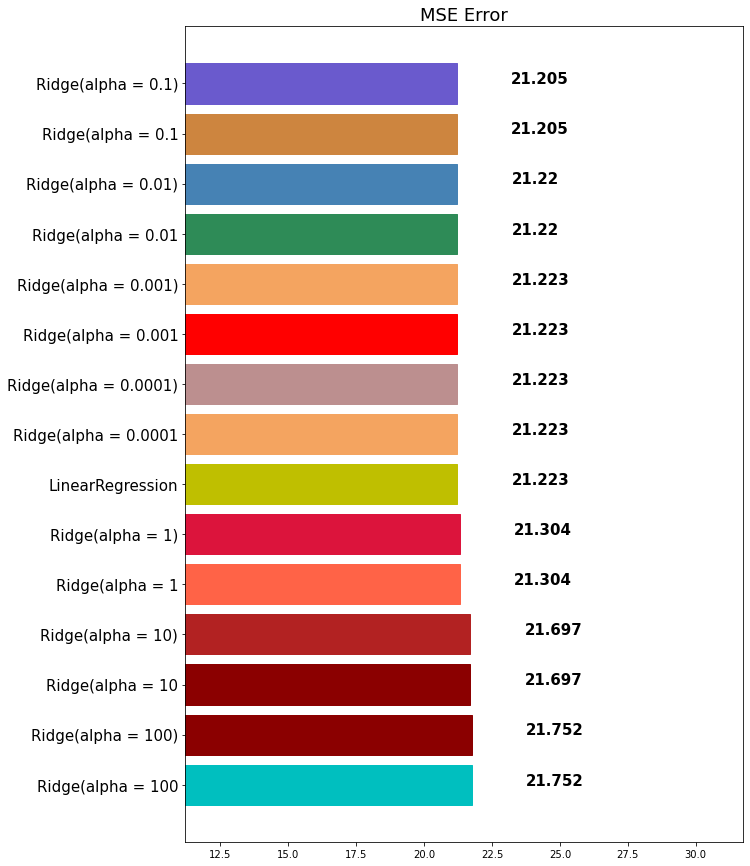

In [ ]:
for alpha in alphas:
  ridge = Ridge(alpha = alpha)
  ridge.fit(x_train,y_train)
  pred = ridge.predict(x_test)
  mse_eval('Ridge(alpha = {})'.format(alpha),pred,y_test)

In [ ]:
x_train.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [ ]:
ridge.coef_ # 각 필드(컬럼)에 적용된 기울기 값을 반환(0에 가까울수록 학습에 대한 영향력이 약하다.)

array([ -0.09282915,   0.05031757,  -0.00639604,   2.53690737,
       -18.57051864,   4.10569466,  -0.00301795,  -1.49662515,
         0.27919202,  -0.01227282,  -1.02466544,   0.00936423,
        -0.45444272])

In [ ]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)
    
    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

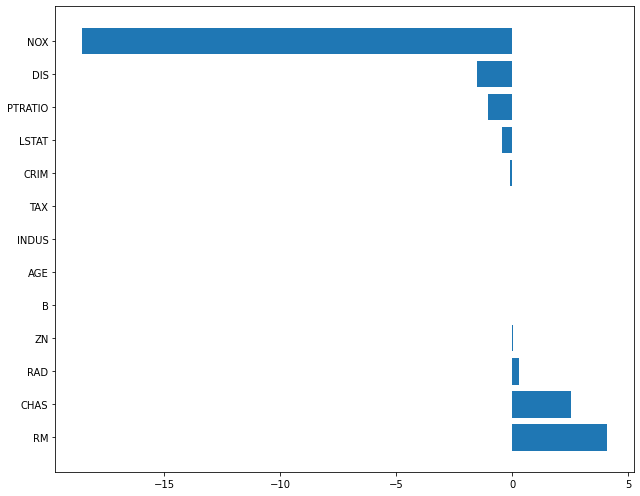

In [ ]:
plot_coef(x_train.columns,ridge.coef_)

In [ ]:
ridge_100 = Ridge(alpha = 100)
ridge_100.fit(x_train,y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha = 0.001)
ridge_001.fit(x_train,y_train)
ridge_pred_100 = ridge_001.predict(x_test)

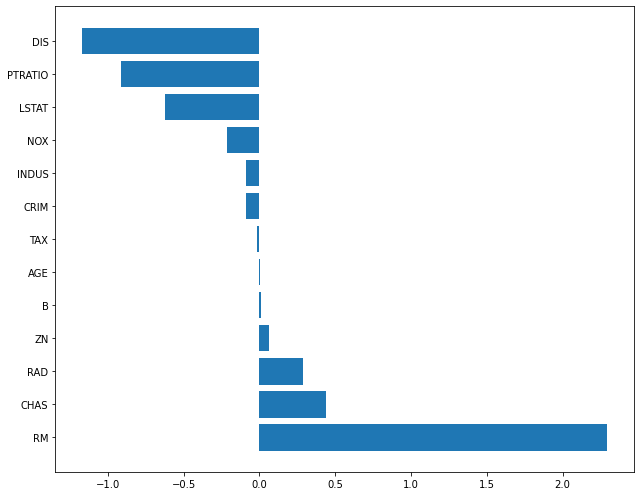

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

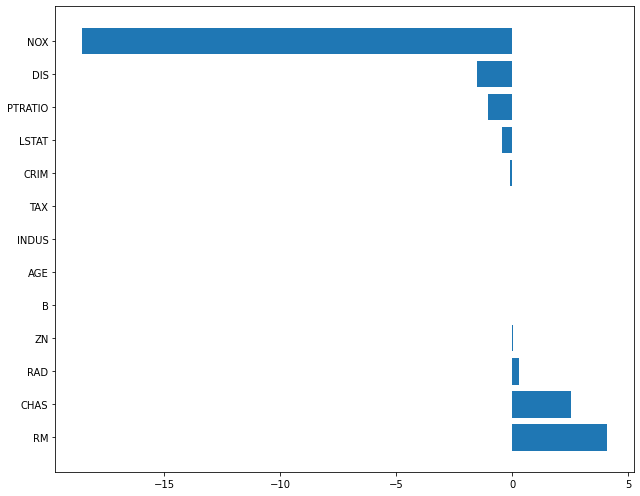

In [ ]:
plot_coef(x_train.columns, ridge_001.coef_)

### **5-2. 랏쏘(Lasso)**

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# 값이 클수록 큰 규제
alphas = [100,10,1,0.1,0.01,0.001,0.0001]

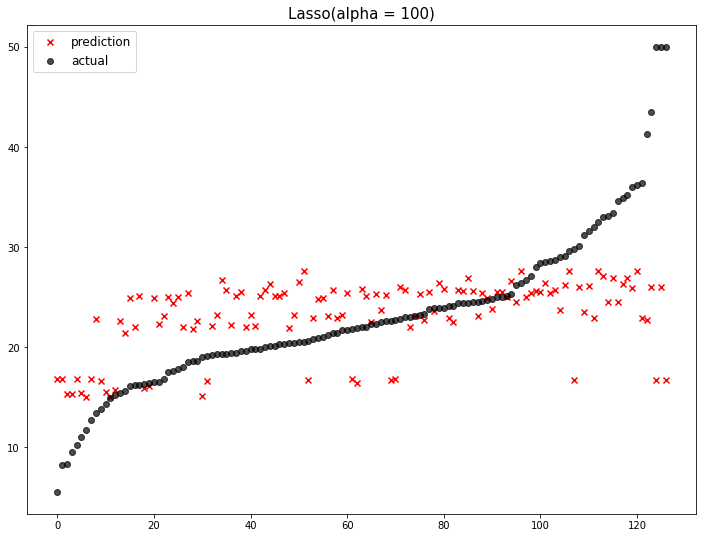

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Ridge(alpha = 100  21.752411
2      Ridge(alpha = 100)  21.752411
3        Ridge(alpha = 10  21.697395
4       Ridge(alpha = 10)  21.697395
5       Lasso(alpha = 10)  21.697395
6         Ridge(alpha = 1  21.303854
7        Ridge(alpha = 1)  21.303854
8        Lasso(alpha = 1)  21.303854
9        LinearRegression  21.222897
10   Ridge(alpha = 0.0001  21.222870
11  Ridge(alpha = 0.0001)  21.222870
12  Lasso(alpha = 0.0001)  21.222870
13    Ridge(alpha = 0.001  21.222629
14   Ridge(alpha = 0.001)  21.222629
15   Lasso(alpha = 0.001)  21.222629
16     Ridge(alpha = 0.01  21.220300
17    Ridge(alpha = 0.01)  21.220300
18    Lasso(alpha = 0.01)  21.220300
19      Ridge(alpha = 0.1  21.204815
20     Ridge(alpha = 0.1)  21.204815
21     Lasso(alpha = 0.1)  21.204815


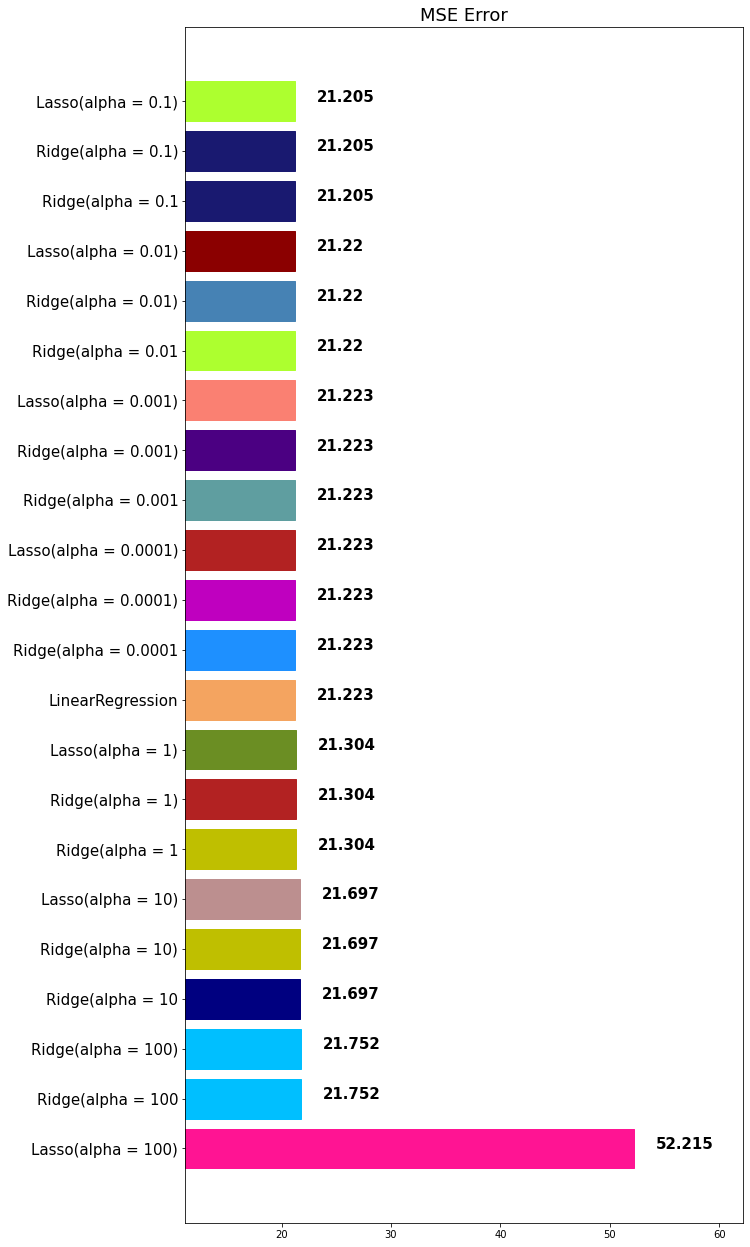

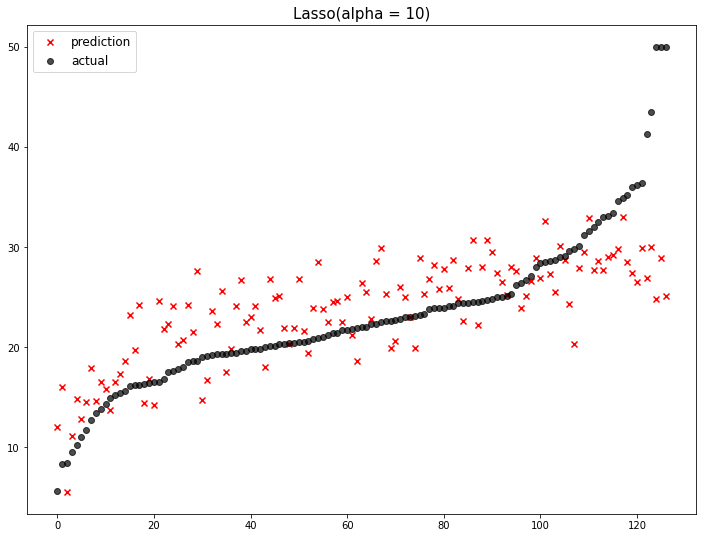

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Lasso(alpha = 10)  32.694745
2       Ridge(alpha = 100  21.752411
3      Ridge(alpha = 100)  21.752411
4        Ridge(alpha = 10  21.697395
5       Ridge(alpha = 10)  21.697395
6         Ridge(alpha = 1  21.303854
7        Ridge(alpha = 1)  21.303854
8        Lasso(alpha = 1)  21.303854
9        LinearRegression  21.222897
10   Ridge(alpha = 0.0001  21.222870
11  Ridge(alpha = 0.0001)  21.222870
12  Lasso(alpha = 0.0001)  21.222870
13    Ridge(alpha = 0.001  21.222629
14   Ridge(alpha = 0.001)  21.222629
15   Lasso(alpha = 0.001)  21.222629
16     Ridge(alpha = 0.01  21.220300
17    Ridge(alpha = 0.01)  21.220300
18    Lasso(alpha = 0.01)  21.220300
19      Ridge(alpha = 0.1  21.204815
20     Ridge(alpha = 0.1)  21.204815
21     Lasso(alpha = 0.1)  21.204815


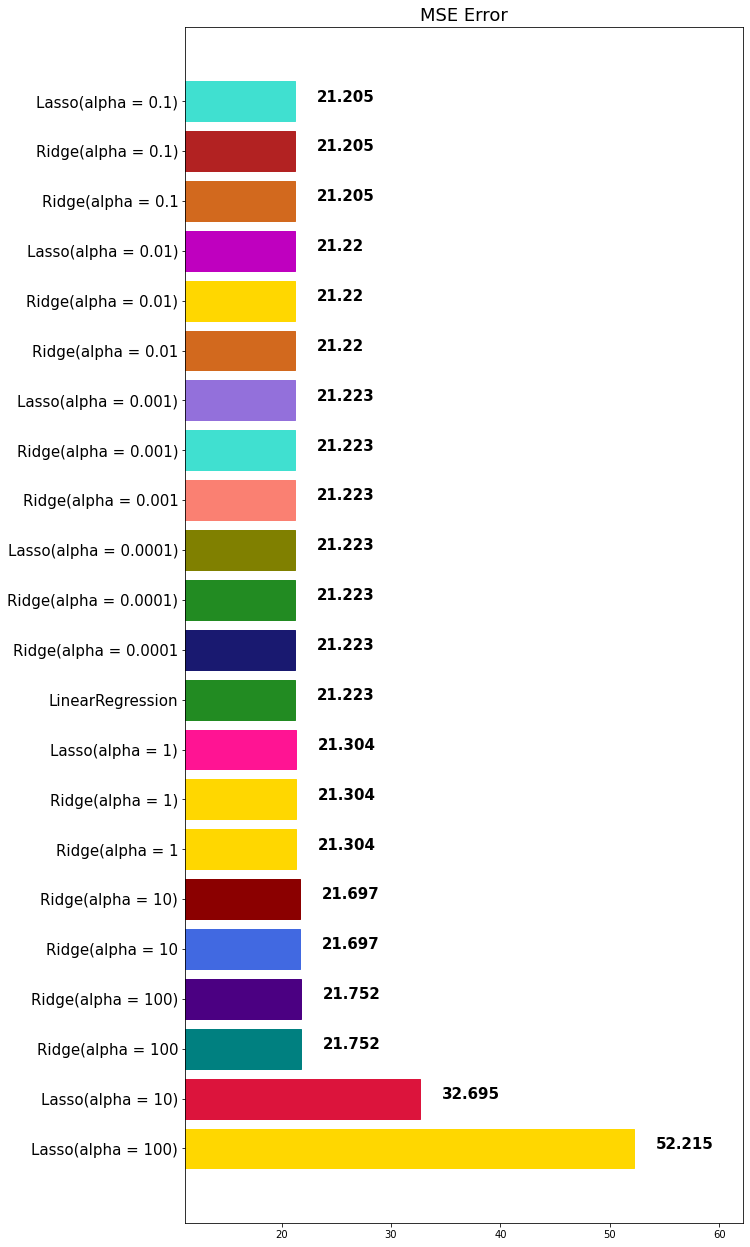

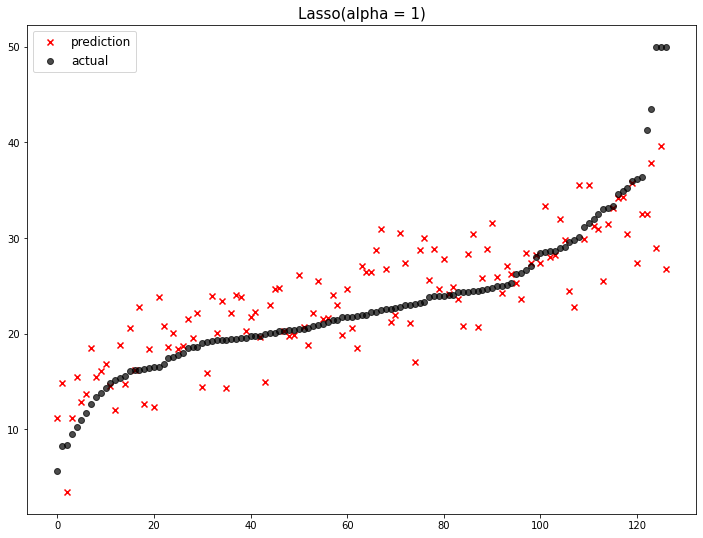

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Lasso(alpha = 10)  32.694745
2        Lasso(alpha = 1)  22.553975
3       Ridge(alpha = 100  21.752411
4      Ridge(alpha = 100)  21.752411
5        Ridge(alpha = 10  21.697395
6       Ridge(alpha = 10)  21.697395
7         Ridge(alpha = 1  21.303854
8        Ridge(alpha = 1)  21.303854
9        LinearRegression  21.222897
10   Ridge(alpha = 0.0001  21.222870
11  Ridge(alpha = 0.0001)  21.222870
12  Lasso(alpha = 0.0001)  21.222870
13    Ridge(alpha = 0.001  21.222629
14   Ridge(alpha = 0.001)  21.222629
15   Lasso(alpha = 0.001)  21.222629
16     Ridge(alpha = 0.01  21.220300
17    Ridge(alpha = 0.01)  21.220300
18    Lasso(alpha = 0.01)  21.220300
19      Ridge(alpha = 0.1  21.204815
20     Ridge(alpha = 0.1)  21.204815
21     Lasso(alpha = 0.1)  21.204815


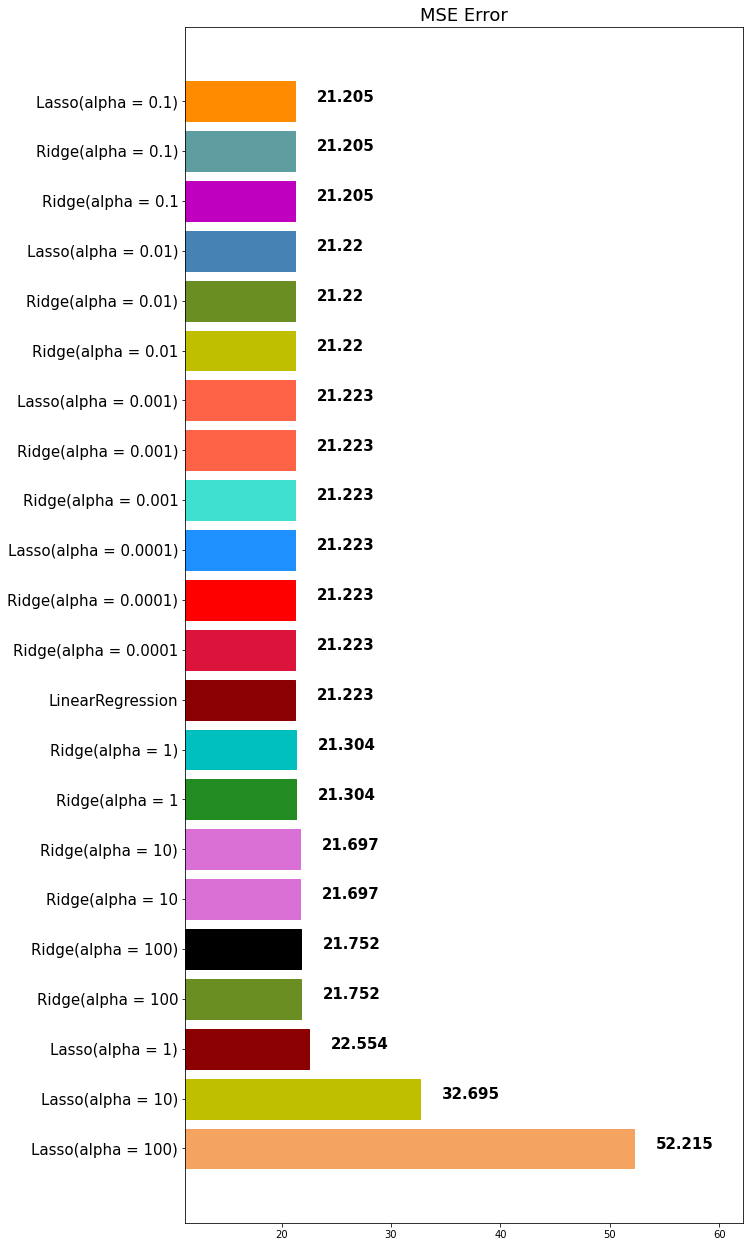

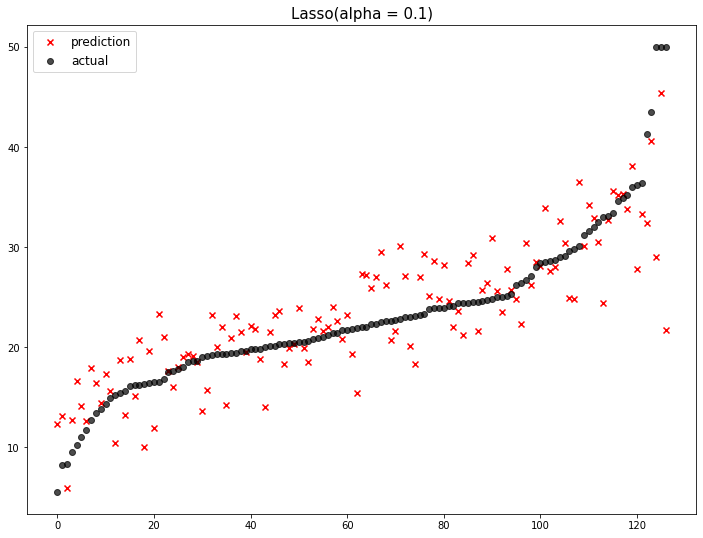

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Lasso(alpha = 10)  32.694745
2        Lasso(alpha = 1)  22.553975
3      Lasso(alpha = 0.1)  22.174751
4       Ridge(alpha = 100  21.752411
5      Ridge(alpha = 100)  21.752411
6        Ridge(alpha = 10  21.697395
7       Ridge(alpha = 10)  21.697395
8         Ridge(alpha = 1  21.303854
9        Ridge(alpha = 1)  21.303854
10       LinearRegression  21.222897
11   Ridge(alpha = 0.0001  21.222870
12  Ridge(alpha = 0.0001)  21.222870
13  Lasso(alpha = 0.0001)  21.222870
14    Ridge(alpha = 0.001  21.222629
15   Ridge(alpha = 0.001)  21.222629
16   Lasso(alpha = 0.001)  21.222629
17     Ridge(alpha = 0.01  21.220300
18    Ridge(alpha = 0.01)  21.220300
19    Lasso(alpha = 0.01)  21.220300
20      Ridge(alpha = 0.1  21.204815
21     Ridge(alpha = 0.1)  21.204815


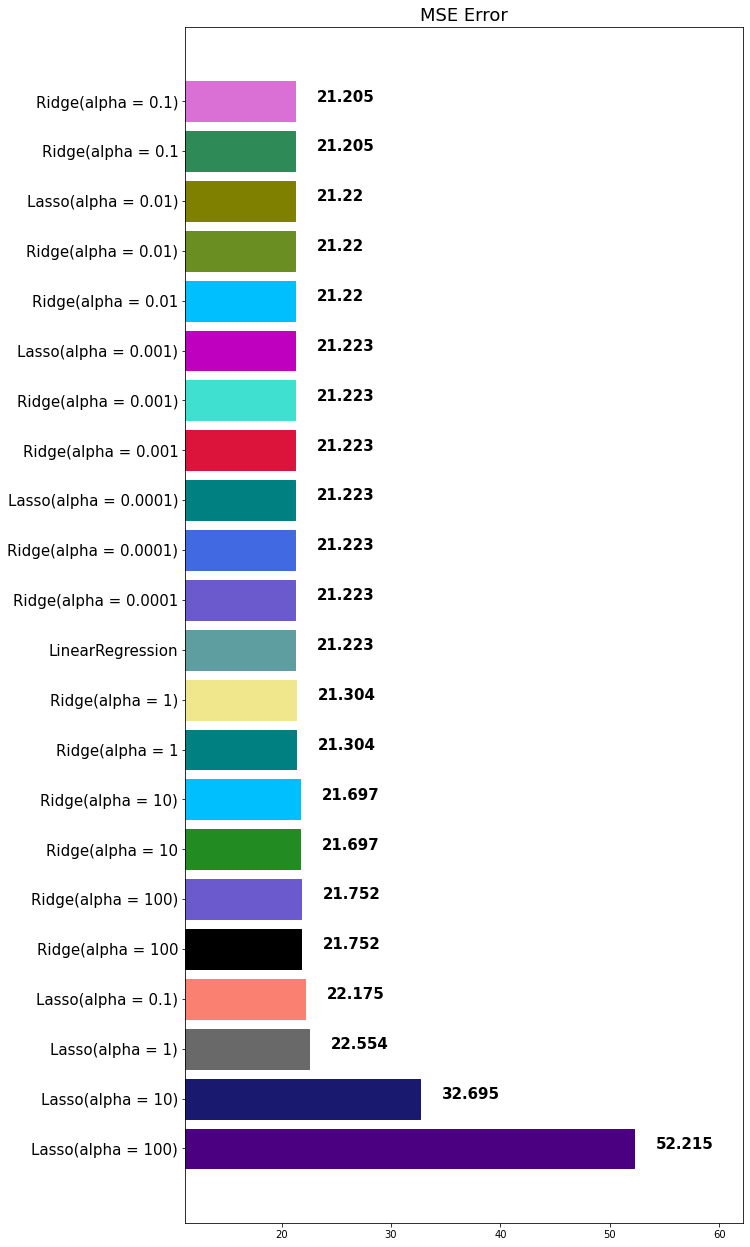

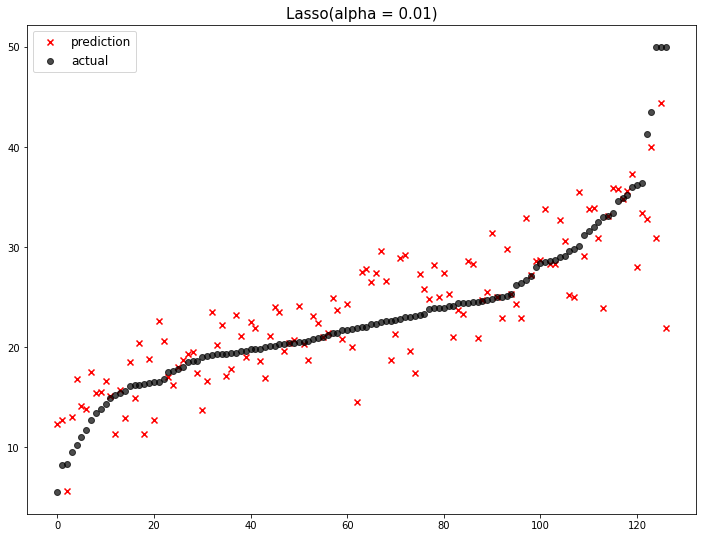

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Lasso(alpha = 10)  32.694745
2        Lasso(alpha = 1)  22.553975
3      Lasso(alpha = 0.1)  22.174751
4       Ridge(alpha = 100  21.752411
5      Ridge(alpha = 100)  21.752411
6        Ridge(alpha = 10  21.697395
7       Ridge(alpha = 10)  21.697395
8         Ridge(alpha = 1  21.303854
9        Ridge(alpha = 1)  21.303854
10       LinearRegression  21.222897
11   Ridge(alpha = 0.0001  21.222870
12  Ridge(alpha = 0.0001)  21.222870
13  Lasso(alpha = 0.0001)  21.222870
14    Ridge(alpha = 0.001  21.222629
15   Ridge(alpha = 0.001)  21.222629
16   Lasso(alpha = 0.001)  21.222629
17     Ridge(alpha = 0.01  21.220300
18    Ridge(alpha = 0.01)  21.220300
19      Ridge(alpha = 0.1  21.204815
20     Ridge(alpha = 0.1)  21.204815
21    Lasso(alpha = 0.01)  21.197950


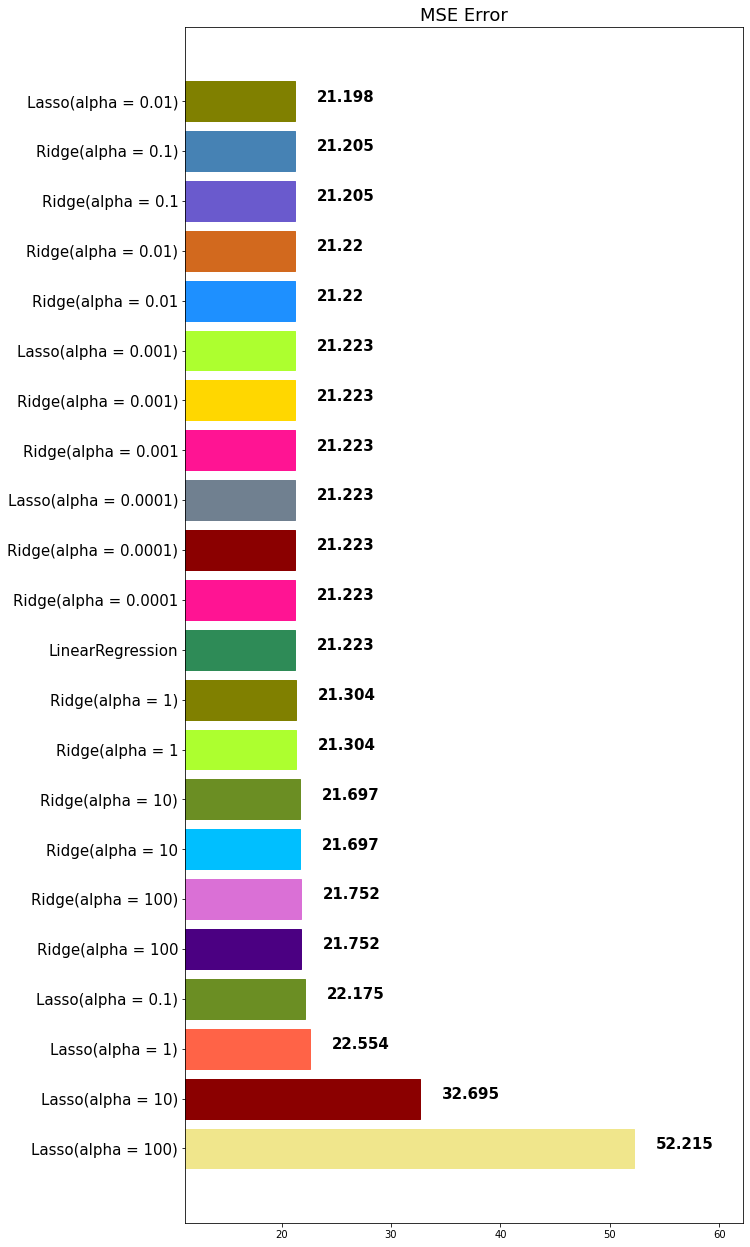

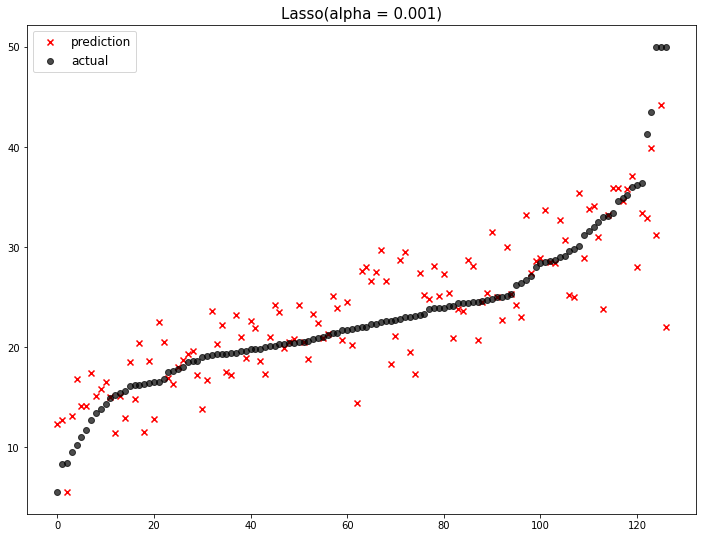

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Lasso(alpha = 10)  32.694745
2        Lasso(alpha = 1)  22.553975
3      Lasso(alpha = 0.1)  22.174751
4       Ridge(alpha = 100  21.752411
5      Ridge(alpha = 100)  21.752411
6        Ridge(alpha = 10  21.697395
7       Ridge(alpha = 10)  21.697395
8         Ridge(alpha = 1  21.303854
9        Ridge(alpha = 1)  21.303854
10       LinearRegression  21.222897
11   Ridge(alpha = 0.0001  21.222870
12  Ridge(alpha = 0.0001)  21.222870
13  Lasso(alpha = 0.0001)  21.222870
14    Ridge(alpha = 0.001  21.222629
15   Ridge(alpha = 0.001)  21.222629
16     Ridge(alpha = 0.01  21.220300
17    Ridge(alpha = 0.01)  21.220300
18   Lasso(alpha = 0.001)  21.216961
19      Ridge(alpha = 0.1  21.204815
20     Ridge(alpha = 0.1)  21.204815
21    Lasso(alpha = 0.01)  21.197950


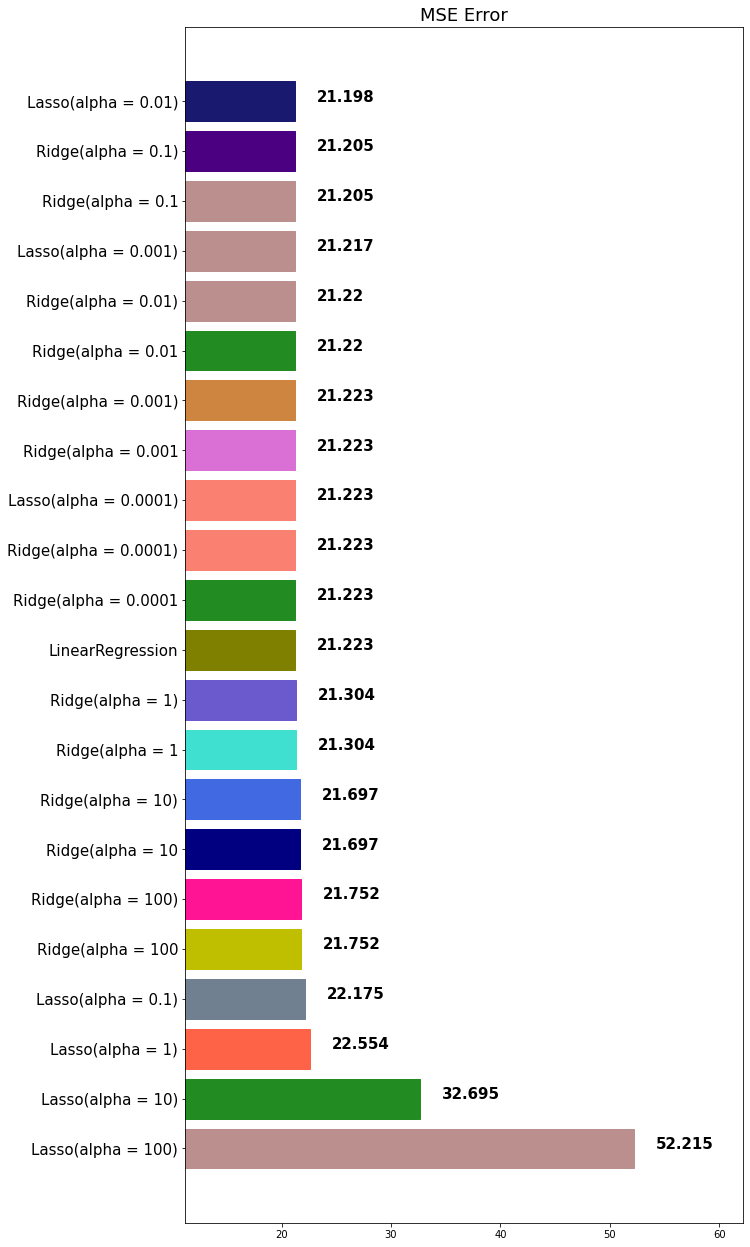

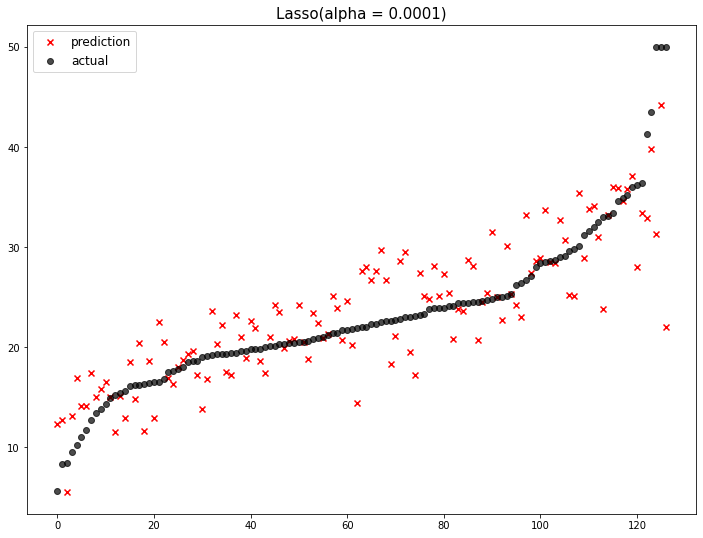

                    model        mse
0      Lasso(alpha = 100)  52.215143
1       Lasso(alpha = 10)  32.694745
2        Lasso(alpha = 1)  22.553975
3      Lasso(alpha = 0.1)  22.174751
4       Ridge(alpha = 100  21.752411
5      Ridge(alpha = 100)  21.752411
6        Ridge(alpha = 10  21.697395
7       Ridge(alpha = 10)  21.697395
8         Ridge(alpha = 1  21.303854
9        Ridge(alpha = 1)  21.303854
10       LinearRegression  21.222897
11   Ridge(alpha = 0.0001  21.222870
12  Ridge(alpha = 0.0001)  21.222870
13    Ridge(alpha = 0.001  21.222629
14   Ridge(alpha = 0.001)  21.222629
15  Lasso(alpha = 0.0001)  21.222270
16     Ridge(alpha = 0.01  21.220300
17    Ridge(alpha = 0.01)  21.220300
18   Lasso(alpha = 0.001)  21.216961
19      Ridge(alpha = 0.1  21.204815
20     Ridge(alpha = 0.1)  21.204815
21    Lasso(alpha = 0.01)  21.197950


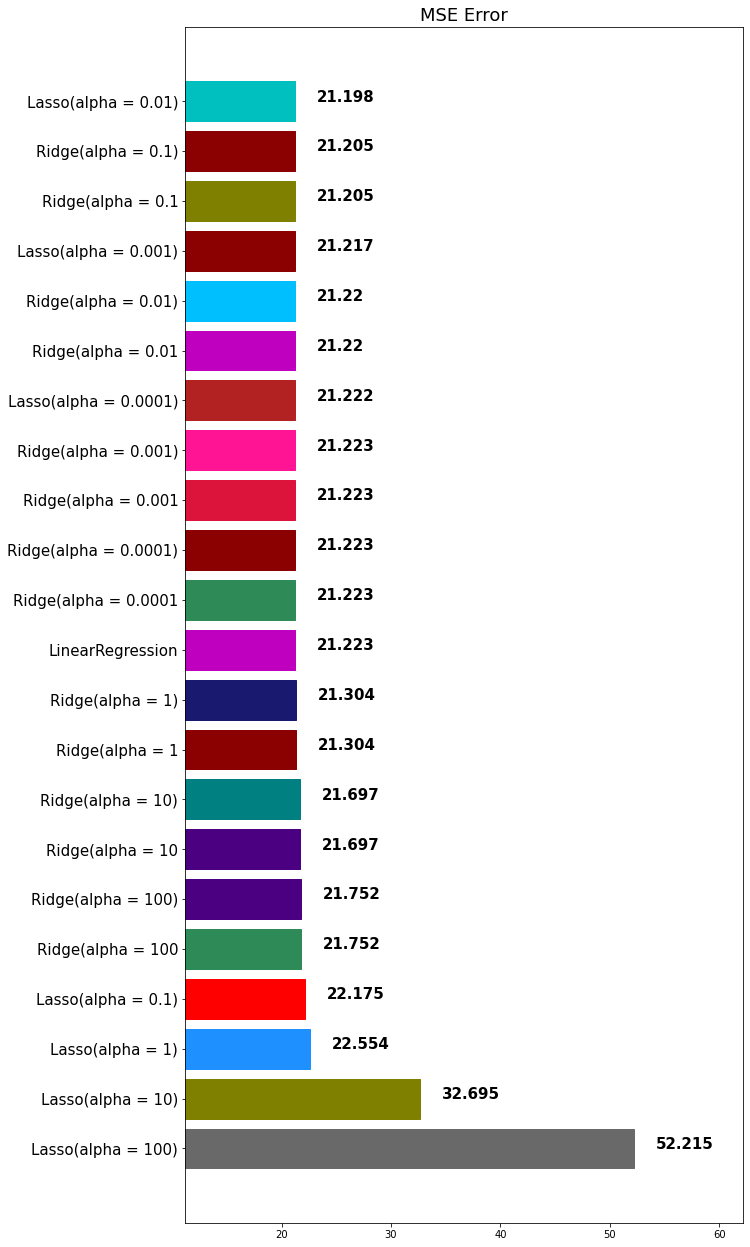

In [ ]:
for alpha in alphas:
  lasso = Lasso(alpha = alpha)
  lasso.fit(x_train,y_train)
  pred = lasso.predict(x_test)
  mse_eval('Lasso(alpha = {})'.format(alpha),pred,y_test)

In [ ]:
lasso_100 = Lasso(alpha = 100)
lasso_100.fit(x_train,y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha = 0.001)
lasso_001.fit(x_train,y_train)
lasso_pred_100 = lasso_001.predict(x_test)

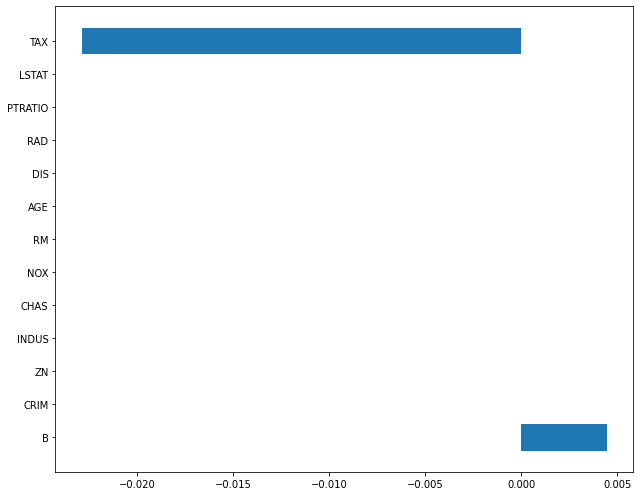

In [ ]:
plot_coef(x_train.columns,lasso_100.coef_)

In [ ]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.        , -0.02287025,
       -0.        ,  0.00443625, -0.        ])

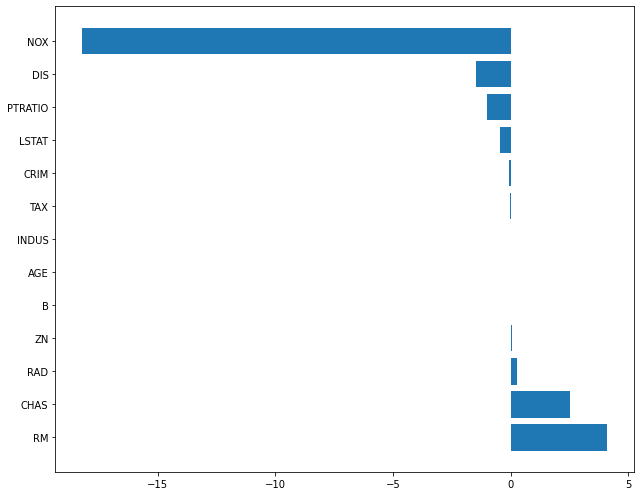

In [ ]:
plot_coef(x_train.columns,lasso_001.coef_)

In [ ]:
lasso_001.coef_

array([ -0.09266938,   0.05040994,  -0.00763376,   2.51534715,
       -18.23671482,   4.10749902,  -0.00328095,  -1.49184029,
         0.2783402 ,  -0.01229727,  -1.02121972,   0.00938187,
        -0.45498592])

### **5-3.ElasticNet**
* l1_ratio = 0(L2규제만)
* l1_ratio = 1(L1규제만)
* l1_ratio = 0.xxxx....(혼합 사용/L1을 얼마나 사용할 것인가)


In [ ]:
from sklearn.linear_model import ElasticNet

In [ ]:
ratios = [0.2,0.5,0.8]

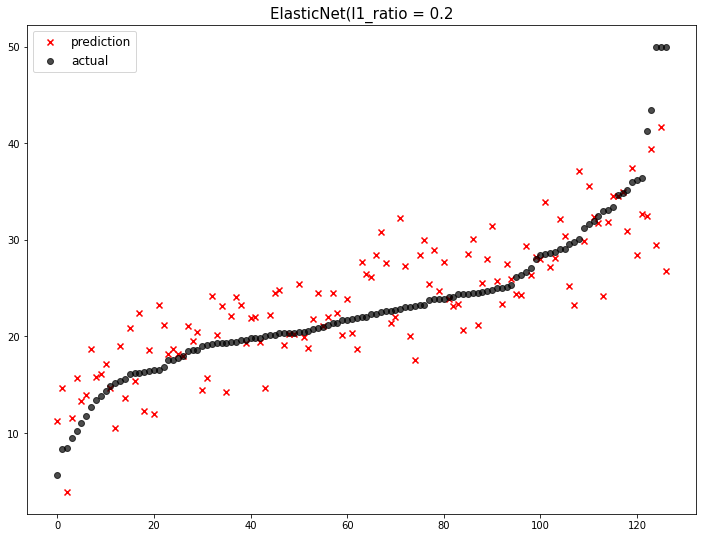

                        model        mse
0          Lasso(alpha = 100)  52.215143
1           Lasso(alpha = 10)  32.694745
2            Lasso(alpha = 1)  22.553975
3          Lasso(alpha = 0.1)  22.174751
4   ElasticNet(l1_ratio = 0.2  22.018912
5           Ridge(alpha = 100  21.752411
6          Ridge(alpha = 100)  21.752411
7            Ridge(alpha = 10  21.697395
8           Ridge(alpha = 10)  21.697395
9             Ridge(alpha = 1  21.303854
10           Ridge(alpha = 1)  21.303854
11           LinearRegression  21.222897
12       Ridge(alpha = 0.0001  21.222870
13      Ridge(alpha = 0.0001)  21.222870
14        Ridge(alpha = 0.001  21.222629
15       Ridge(alpha = 0.001)  21.222629
16      Lasso(alpha = 0.0001)  21.222270
17         Ridge(alpha = 0.01  21.220300
18        Ridge(alpha = 0.01)  21.220300
19       Lasso(alpha = 0.001)  21.216961
20          Ridge(alpha = 0.1  21.204815
21         Ridge(alpha = 0.1)  21.204815
22        Lasso(alpha = 0.01)  21.197950


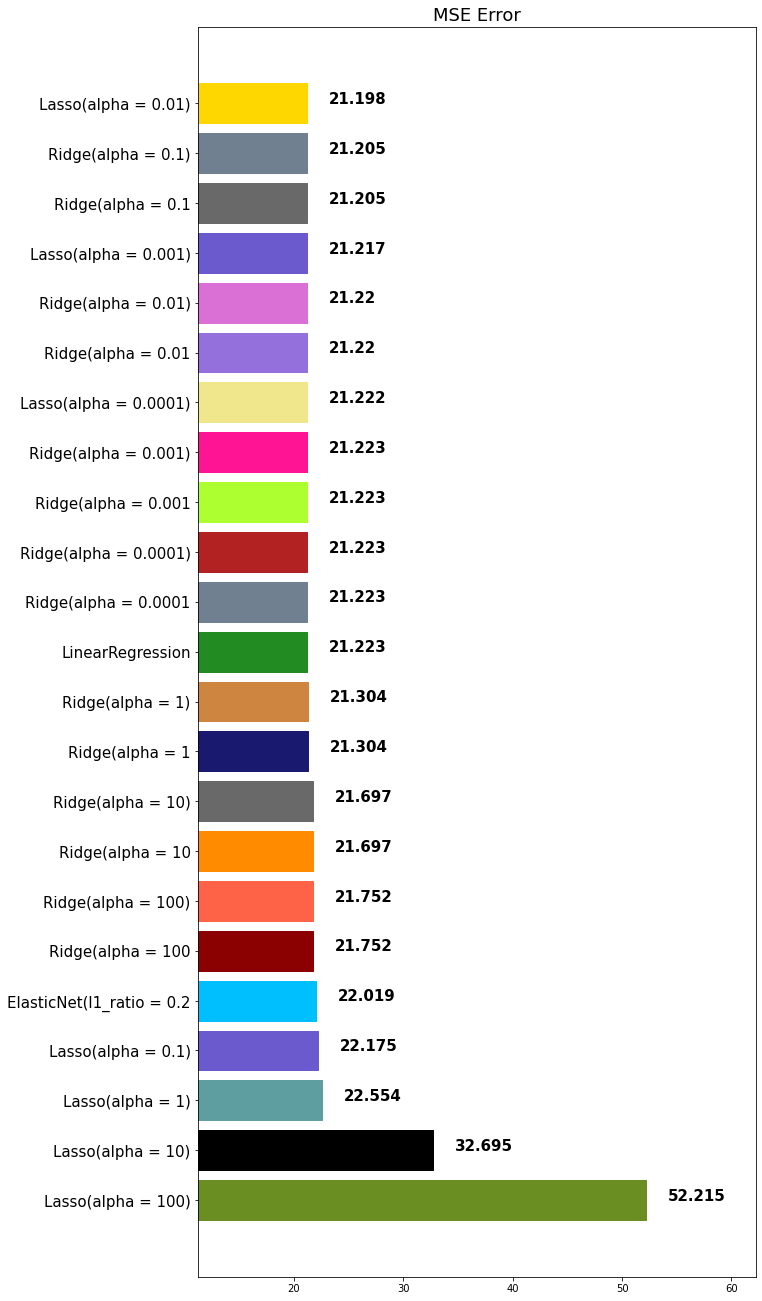

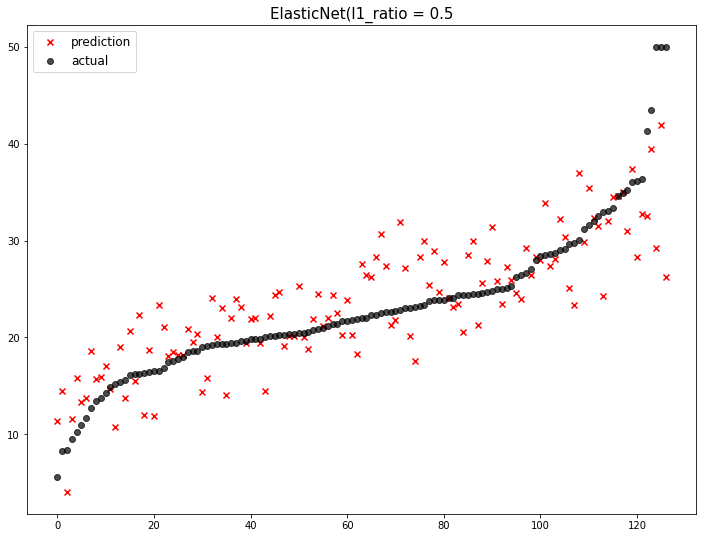

                        model        mse
0          Lasso(alpha = 100)  52.215143
1           Lasso(alpha = 10)  32.694745
2            Lasso(alpha = 1)  22.553975
3          Lasso(alpha = 0.1)  22.174751
4   ElasticNet(l1_ratio = 0.2  22.018912
5   ElasticNet(l1_ratio = 0.5  21.983280
6           Ridge(alpha = 100  21.752411
7          Ridge(alpha = 100)  21.752411
8            Ridge(alpha = 10  21.697395
9           Ridge(alpha = 10)  21.697395
10            Ridge(alpha = 1  21.303854
11           Ridge(alpha = 1)  21.303854
12           LinearRegression  21.222897
13       Ridge(alpha = 0.0001  21.222870
14      Ridge(alpha = 0.0001)  21.222870
15        Ridge(alpha = 0.001  21.222629
16       Ridge(alpha = 0.001)  21.222629
17      Lasso(alpha = 0.0001)  21.222270
18         Ridge(alpha = 0.01  21.220300
19        Ridge(alpha = 0.01)  21.220300
20       Lasso(alpha = 0.001)  21.216961
21          Ridge(alpha = 0.1  21.204815
22         Ridge(alpha = 0.1)  21.204815
23        Lasso(

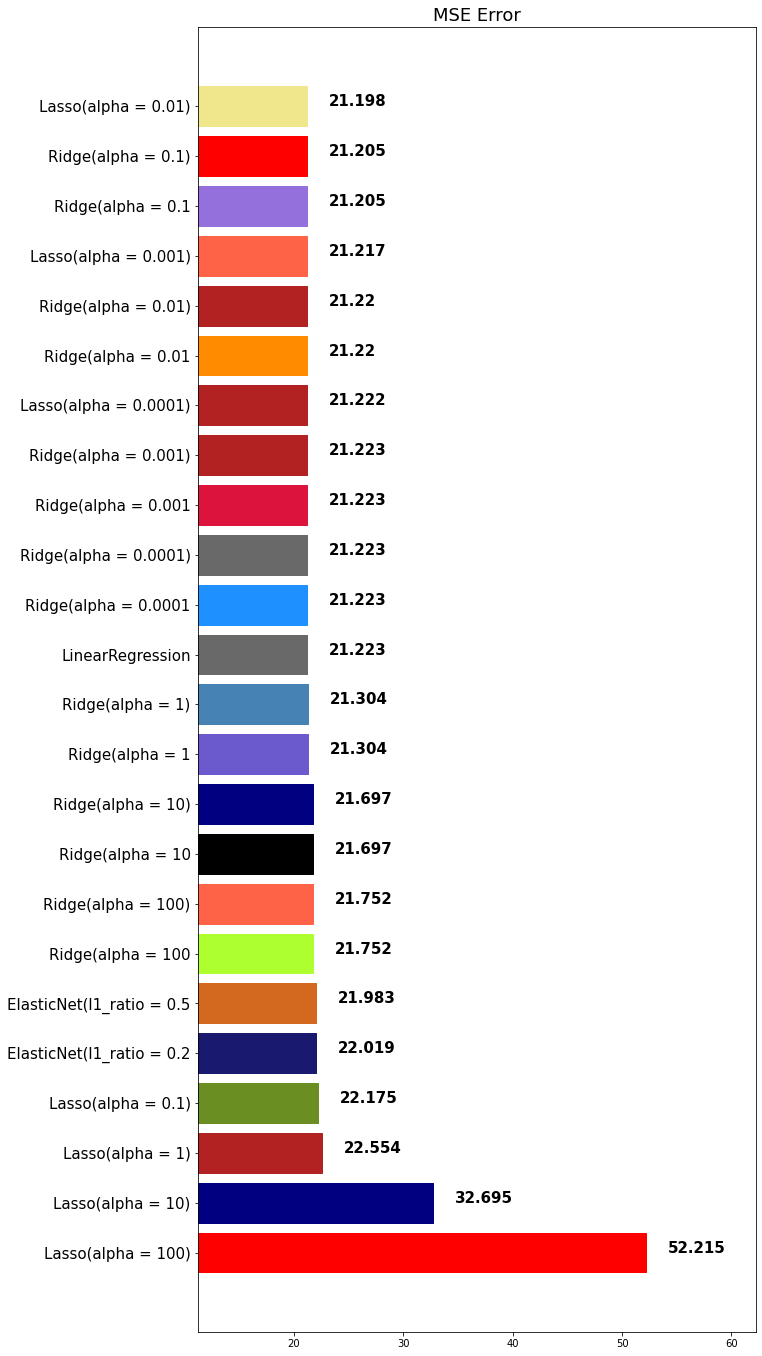

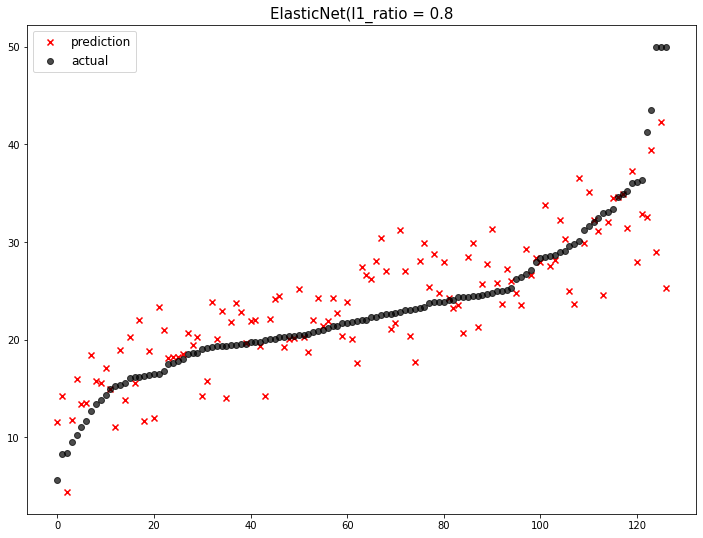

                        model        mse
0          Lasso(alpha = 100)  52.215143
1           Lasso(alpha = 10)  32.694745
2            Lasso(alpha = 1)  22.553975
3          Lasso(alpha = 0.1)  22.174751
4   ElasticNet(l1_ratio = 0.2  22.018912
5   ElasticNet(l1_ratio = 0.5  21.983280
6   ElasticNet(l1_ratio = 0.8  21.907739
7           Ridge(alpha = 100  21.752411
8          Ridge(alpha = 100)  21.752411
9            Ridge(alpha = 10  21.697395
10          Ridge(alpha = 10)  21.697395
11            Ridge(alpha = 1  21.303854
12           Ridge(alpha = 1)  21.303854
13           LinearRegression  21.222897
14       Ridge(alpha = 0.0001  21.222870
15      Ridge(alpha = 0.0001)  21.222870
16        Ridge(alpha = 0.001  21.222629
17       Ridge(alpha = 0.001)  21.222629
18      Lasso(alpha = 0.0001)  21.222270
19         Ridge(alpha = 0.01  21.220300
20        Ridge(alpha = 0.01)  21.220300
21       Lasso(alpha = 0.001)  21.216961
22          Ridge(alpha = 0.1  21.204815
23         Ridge

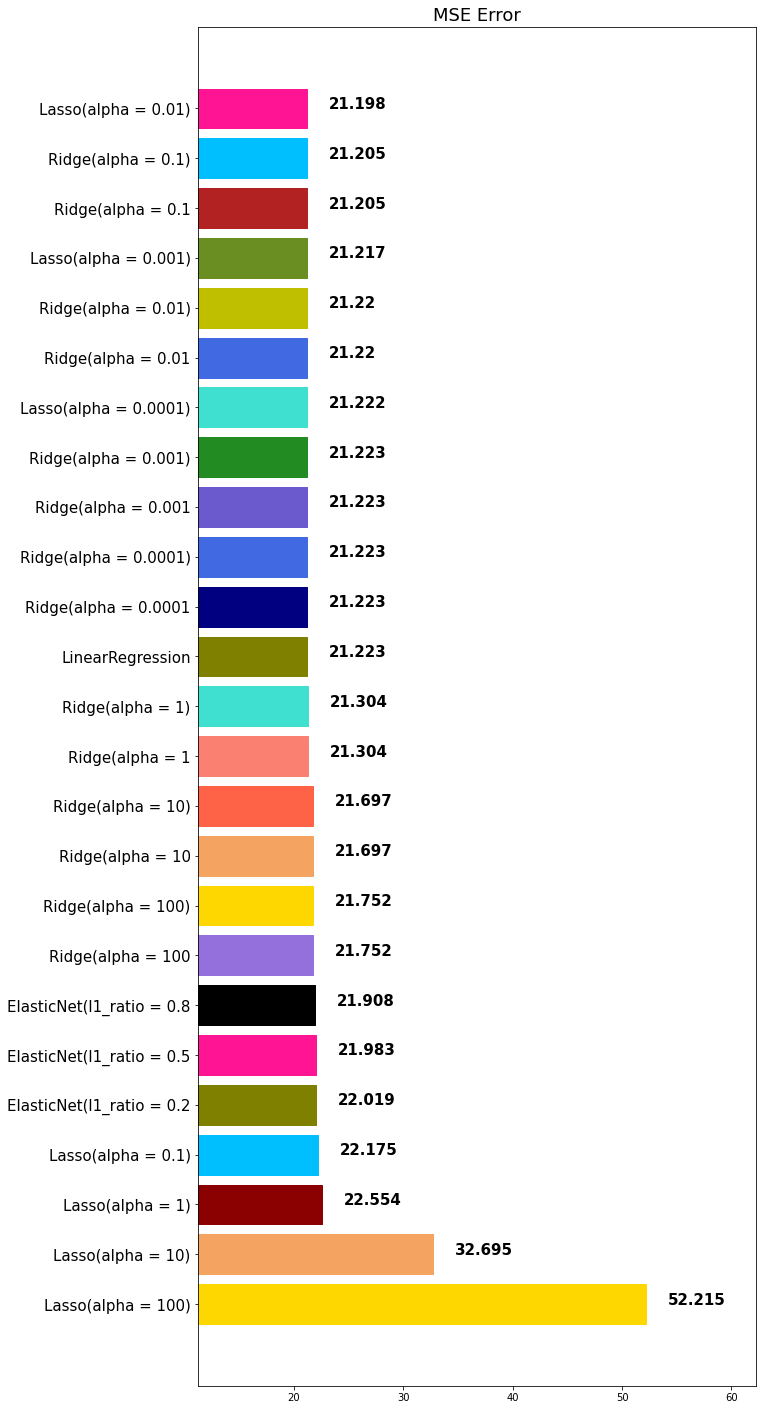

In [ ]:
for ratio in ratios:
  elasticnet = ElasticNet(alpha = 0.5,l1_ratio = ratio)
  elasticnet.fit(x_train,y_train)
  pred = elasticnet.predict(x_test)
  mse_eval('ElasticNet(l1_ratio = {})'.format(ratio),pred,y_test)

In [ ]:
elasticnet_20 = ElasticNet(alpha = 5, l1_ratio = 0.2)
elasticnet_20.fit(x_train,y_train)
elasticnet_pred_20 = elasticnet_20.predict(x_test)

elasticnet_80 = ElasticNet(alpha = 5, l1_ratio = 0.8)
elasticnet_80.fit(x_train,y_train)
elasticnet_pred_80 = elasticnet_80.predict(x_test)

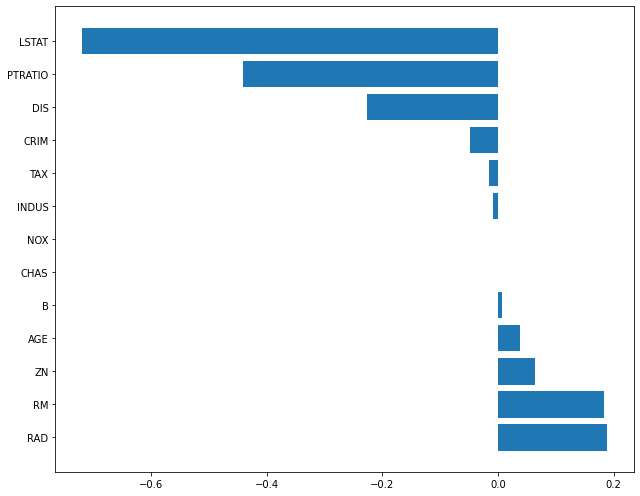

In [ ]:
plot_coef(x_train.columns,elasticnet_20.coef_)

In [ ]:
elasticnet_80.coef_

array([-0.        ,  0.05537948, -0.        ,  0.        , -0.        ,
        0.        ,  0.03587041, -0.        ,  0.        , -0.00811891,
       -0.0899421 ,  0.00652012, -0.73838423])

# **6. Scaler**

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [ ]:
x_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,4.124064,10.496042,11.457889,0.065963,0.560426,6.290050,69.517150,3.694434,10.068602,416.261214,18.555145,354.961900,13.018285
std,9.468932,22.638273,6.895494,0.248546,0.116751,0.739425,28.406455,2.043321,8.977664,173.540163,2.155550,93.166397,7.471685
min,0.006320,0.000000,0.460000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082545,0.000000,5.480000,0.000000,0.455500,5.882500,45.750000,2.043300,4.000000,280.000000,17.400000,374.960000,6.970000
50%,0.329820,0.000000,9.900000,0.000000,0.538000,6.202000,79.900000,3.152300,5.000000,334.000000,19.100000,391.230000,12.010000
75%,4.612350,6.250000,18.100000,0.000000,0.647000,6.611000,94.450000,5.108550,24.000000,666.000000,20.200000,396.210000,17.360000
max,88.976200,95.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


### **6-1. StandardScaler**
* 평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러


In [ ]:
std_scaler = StandardScaler()

In [ ]:
std_scaled = std_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(std_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,0.00,-0.00,-0.00,-0.00,0.00,-0.00,0.00,0.00,-0.00,-0.00,-0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-0.44,-0.46,-1.60,-0.27,-1.47,-3.70,-2.35,-1.26,-1.01,-1.32,-2.77,-3.81,-1.51
25%,-0.43,-0.46,-0.87,-0.27,-0.90,-0.55,-0.84,-0.81,-0.68,-0.79,-0.54,0.21,-0.81
50%,-0.40,-0.46,-0.23,-0.27,-0.19,-0.12,0.37,-0.27,-0.57,-0.47,0.25,0.39,-0.14
75%,0.05,-0.19,0.96,-0.27,0.74,0.43,0.88,0.69,1.55,1.44,0.76,0.44,0.58
max,8.97,3.74,2.36,3.76,2.66,3.37,1.07,4.13,1.55,1.70,1.60,0.45,3.34


### **6-2.MinMaxScaler**
* min값과 max값을 0~1 사이로 정규화시키는 스케일러

In [ ]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)
round(pd.DataFrame(minmax_scaled).describe(),2)

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.05,0.11,0.40,0.07,0.36,0.52,0.69,0.23,0.39,0.44,0.63,0.89,0.31
std,0.11,0.24,0.25,0.25,0.24,0.14,0.29,0.19,0.39,0.33,0.23,0.23,0.21
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.18,0.00,0.14,0.44,0.44,0.08,0.13,0.18,0.51,0.94,0.14
50%,0.00,0.00,0.35,0.00,0.31,0.51,0.79,0.18,0.17,0.28,0.69,0.99,0.28
75%,0.05,0.07,0.65,0.00,0.54,0.58,0.94,0.36,1.00,0.91,0.81,1.00,0.43
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


###**6-3.RobustScaler**
* 중앙값(median)이 0, IQR(InterQuatile Range)이 1이 되도록 변환
* outlier 값 처리에 유용


In [ ]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [ ]:
round(pd.DataFrame(robust_scaled).median(),2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
dtype: float64

# **7. 파이프라인**


In [ ]:
from sklearn.pipeline import make_pipeline

In [ ]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha = 0.1, l1_ratio = 0.2)
)

In [ ]:
elasticnet_pred = elasticnet_pipeline.fit(x_train,y_train).predict(x_test)

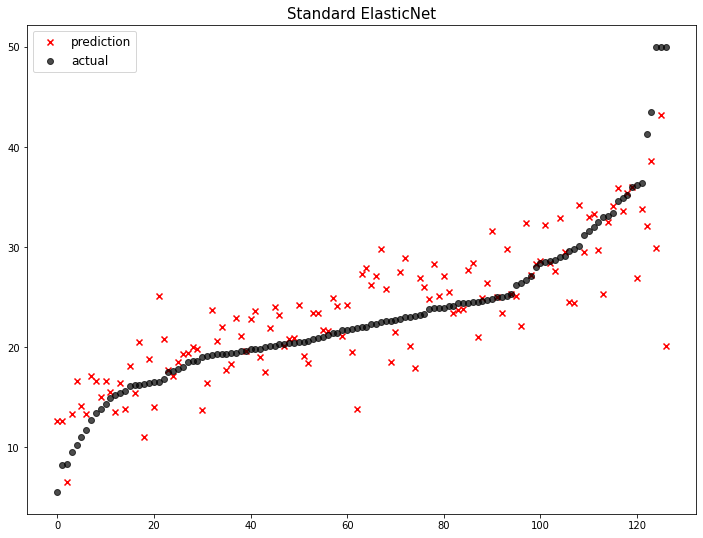

                        model        mse
0          Lasso(alpha = 100)  52.215143
1           Lasso(alpha = 10)  32.694745
2            Lasso(alpha = 1)  22.553975
3         Standard ElasticNet  22.327343
4          Lasso(alpha = 0.1)  22.174751
5   ElasticNet(l1_ratio = 0.2  22.018912
6   ElasticNet(l1_ratio = 0.5  21.983280
7   ElasticNet(l1_ratio = 0.8  21.907739
8           Ridge(alpha = 100  21.752411
9          Ridge(alpha = 100)  21.752411
10           Ridge(alpha = 10  21.697395
11          Ridge(alpha = 10)  21.697395
12            Ridge(alpha = 1  21.303854
13           Ridge(alpha = 1)  21.303854
14           LinearRegression  21.222897
15       Ridge(alpha = 0.0001  21.222870
16      Ridge(alpha = 0.0001)  21.222870
17        Ridge(alpha = 0.001  21.222629
18       Ridge(alpha = 0.001)  21.222629
19      Lasso(alpha = 0.0001)  21.222270
20         Ridge(alpha = 0.01  21.220300
21        Ridge(alpha = 0.01)  21.220300
22       Lasso(alpha = 0.001)  21.216961
23          Ridg

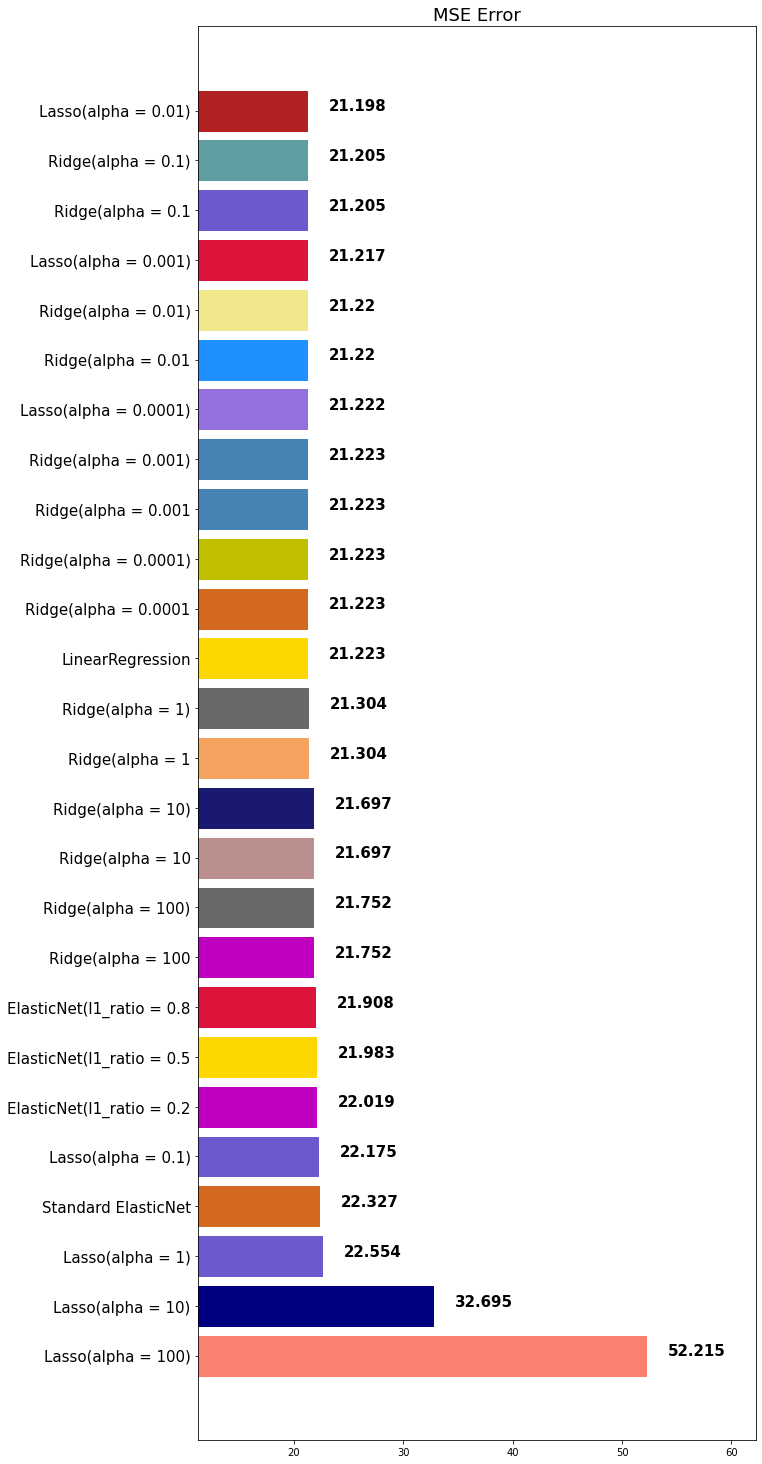

In [ ]:
mse_eval('Standard ElasticNet',elasticnet_pred,y_test)

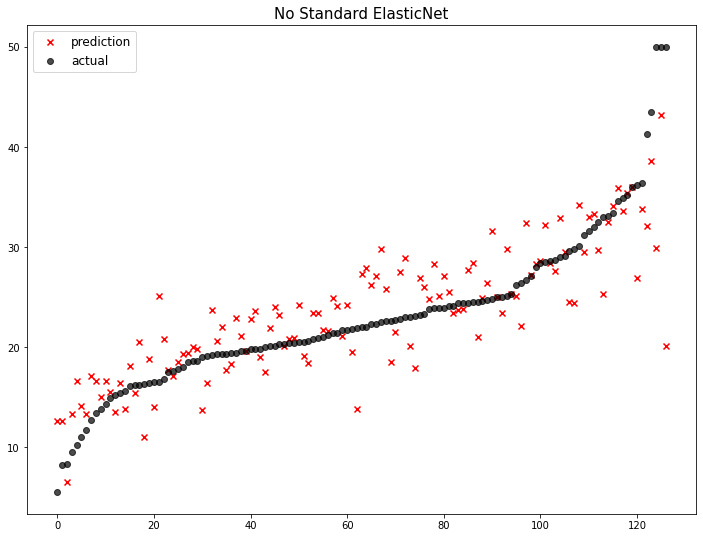

                        model        mse
0          Lasso(alpha = 100)  52.215143
1           Lasso(alpha = 10)  32.694745
2            Lasso(alpha = 1)  22.553975
3         Standard ElasticNet  22.327343
4      No Standard ElasticNet  22.327343
5          Lasso(alpha = 0.1)  22.174751
6   ElasticNet(l1_ratio = 0.2  22.018912
7   ElasticNet(l1_ratio = 0.5  21.983280
8   ElasticNet(l1_ratio = 0.8  21.907739
9           Ridge(alpha = 100  21.752411
10         Ridge(alpha = 100)  21.752411
11           Ridge(alpha = 10  21.697395
12          Ridge(alpha = 10)  21.697395
13            Ridge(alpha = 1  21.303854
14           Ridge(alpha = 1)  21.303854
15           LinearRegression  21.222897
16       Ridge(alpha = 0.0001  21.222870
17      Ridge(alpha = 0.0001)  21.222870
18        Ridge(alpha = 0.001  21.222629
19       Ridge(alpha = 0.001)  21.222629
20      Lasso(alpha = 0.0001)  21.222270
21         Ridge(alpha = 0.01  21.220300
22        Ridge(alpha = 0.01)  21.220300
23       Lasso(a

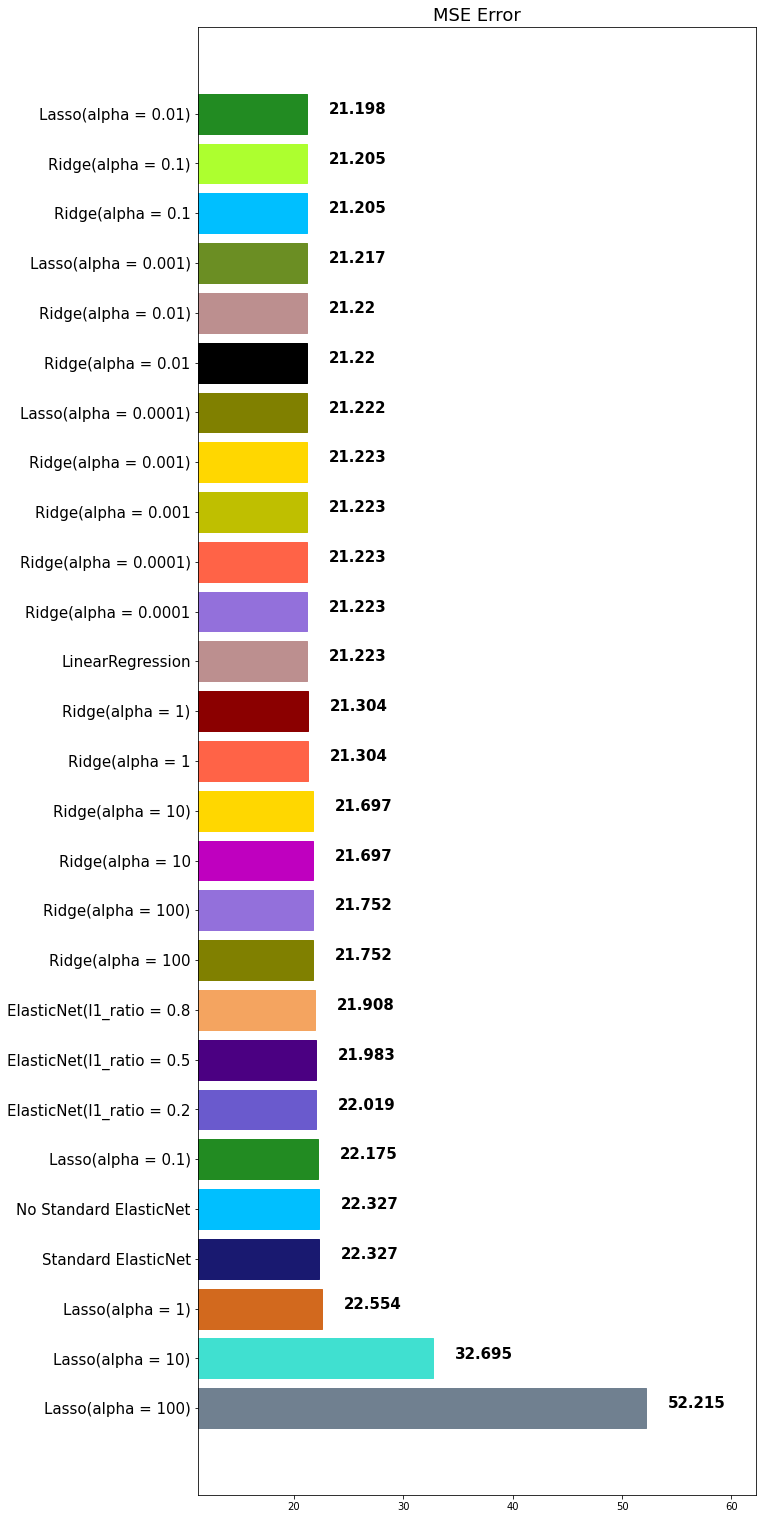

In [ ]:
elasticnet_no_pipeline = ElasticNet(alpha = 0.1,l1_ratio = 0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train,y_train).predict(x_test)
mse_eval('No Standard ElasticNet',elasticnet_pred,y_test) 

# **8. Polynomial Features**


* [도큐먼트](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html?highlight=poly%20feature#sklearn.preprocessing.PolynomialFeatures)
* 다항식의 계수 간의 상호작용을 통해 새로운 feature를 생성
* [a,b] 2개의 feature가 존재할 때 degree = 2로 설정하면 polynomial features는 [1,a,b,a^2,ab,b^2]가 된다.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
poly = PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
poly_features = poly.fit_transform(x_train)[0] 

In [ ]:
poly_features

array([     3.56868   ,      0.        ,     18.1       ,      0.        ,
            0.58      ,      6.437     ,     75.        ,      2.8965    ,
           24.        ,    666.        ,     20.2       ,    393.37      ,
           14.36      ,     12.73547694,      0.        ,     64.593108  ,
            0.        ,      2.0698344 ,     22.97159316,    267.651     ,
           10.33668162,     85.64832   ,   2376.74088   ,     72.087336  ,
         1403.8116516 ,     51.2462448 ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,      0.        ,      0.        ,
            0.        ,      0.        ,    327.61      ,      0.        ,
           10.498     ,    116.5097    ,   1357.5       ,     52.42665   ,
          434.4       ,  12054.6       ,    365.62      ,   7119.997     ,
          259.916     ,      0.        ,      0.        ,      0.        ,
            0.        ,  

In [ ]:
x_train.iloc[0]

CRIM         3.56868
ZN           0.00000
INDUS       18.10000
CHAS         0.00000
NOX          0.58000
RM           6.43700
AGE         75.00000
DIS          2.89650
RAD         24.00000
TAX        666.00000
PTRATIO     20.20000
B          393.37000
LSTAT       14.36000
Name: 472, dtype: float64

In [ ]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree = 2,include_bias = False),
                       StandardScaler(),
                       ElasticNet(alpha = 0.1,l1_ratio = 0.2)
)

In [ ]:
poly_pred = poly_pipeline.fit(x_train,y_train).predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.601e+01, tolerance: 3.495e+00
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


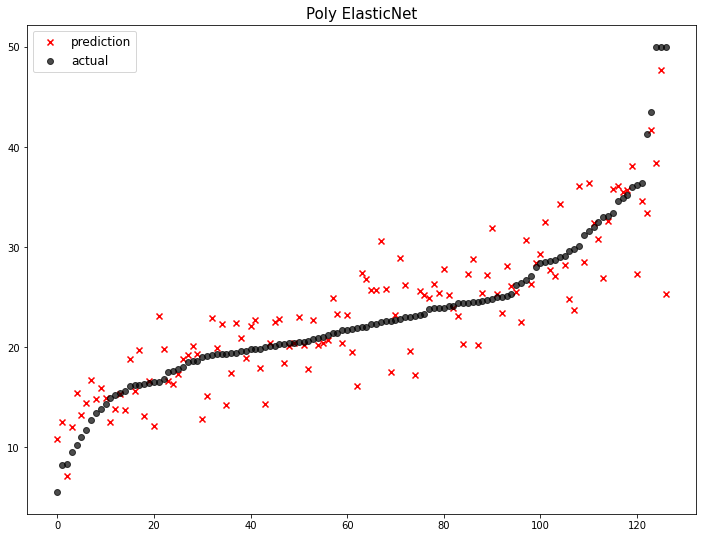

                        model        mse
0          Lasso(alpha = 100)  52.215143
1           Lasso(alpha = 10)  32.694745
2            Lasso(alpha = 1)  22.553975
3         Standard ElasticNet  22.327343
4      No Standard ElasticNet  22.327343
5          Lasso(alpha = 0.1)  22.174751
6   ElasticNet(l1_ratio = 0.2  22.018912
7   ElasticNet(l1_ratio = 0.5  21.983280
8   ElasticNet(l1_ratio = 0.8  21.907739
9           Ridge(alpha = 100  21.752411
10         Ridge(alpha = 100)  21.752411
11           Ridge(alpha = 10  21.697395
12          Ridge(alpha = 10)  21.697395
13            Ridge(alpha = 1  21.303854
14           Ridge(alpha = 1)  21.303854
15           LinearRegression  21.222897
16       Ridge(alpha = 0.0001  21.222870
17      Ridge(alpha = 0.0001)  21.222870
18        Ridge(alpha = 0.001  21.222629
19       Ridge(alpha = 0.001)  21.222629
20      Lasso(alpha = 0.0001)  21.222270
21         Ridge(alpha = 0.01  21.220300
22        Ridge(alpha = 0.01)  21.220300
23       Lasso(a

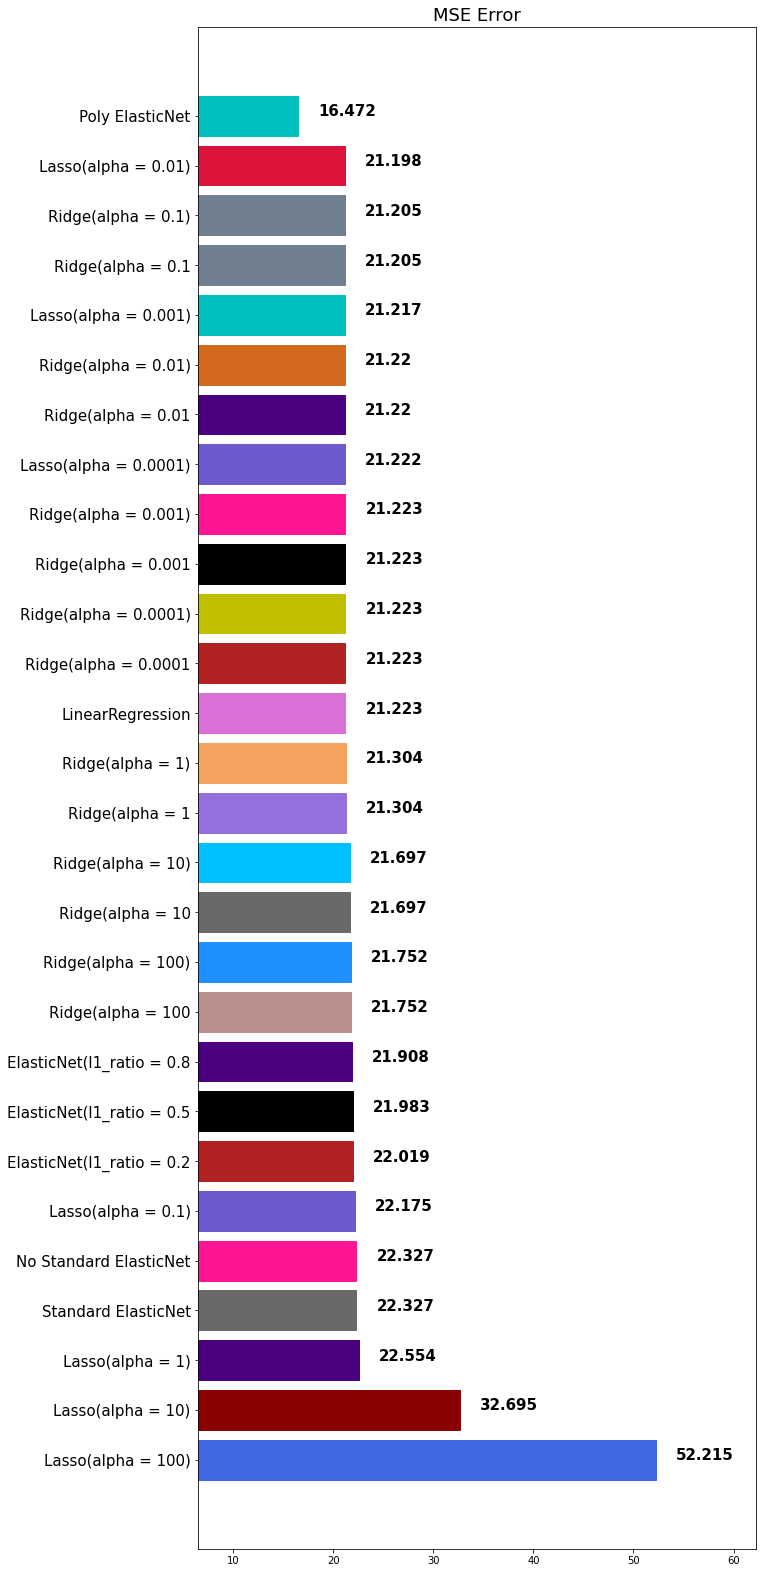

In [ ]:
mse_eval('Poly ElasticNet',poly_pred,y_test)